# Contents <a id='back'></a>

* [importando os dados](#import)
* [tratando os dados](#trat)
* [modificando tabelas](#mod)
* [modificando tabela logs](#modlog)


# importando os dados <a id='import'></a>
primeiro vamos importar as bibliotecas, apos, ler os arquivos e ver suas caracteristicas.

In [1]:
print("olá mundo!")

olá mundo!


In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

try:
    df3 = pd.read_csv('/datasets/visits_log_us.csv') 
except:
    df3=pd.read_csv(
        'D:/Users/PICHAU/Desktop/01 programação/0practicum/análise de dados/projetos/sprint7/visits_log_us.csv')
df3
df3['Device'].unique()

In [4]:
try:
    df1 = pd.read_csv('/datasets/costs_us.csv')
except:
    df1=pd.read_csv('costs_us.csv')
try:
    df2 = pd.read_csv('/datasets/orders_log_us.csv')
except:
    df2=pd.read_csv('orders_log_us.csv')

    
try:
    df3 = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device': 'category'},parse_dates=['Start Ts', 'End Ts']) 
except:
    df3=pd.read_csv(
        'visits_log_us.csv',
         dtype={'Device': 'category'},
         parse_dates=['Start Ts', 'End Ts'],
    )




# tratando os dados <a id="trat"> </a>

corrigindo colunas

usamos o info() para identificar colunas com o tipo incorreto (objeto, quando deveria ser datetime), após passamos a corrigi-las!

In [5]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


In [6]:
df1['dt']=pd.to_datetime(df1['dt'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [7]:
print(df2.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


In [8]:
df2['Buy Ts']=pd.to_datetime(df2['Buy Ts'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [9]:
print(df3.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
None


agora, procuramos eliminar valores absurdos custos ou receitas negativos

In [10]:
df3['Start Ts'].describe()
df3['End Ts'].describe()

count                           359400
mean     2017-12-18 06:28:15.036205056
min                2017-06-01 00:02:00
25%                2017-10-15 09:45:45
50%                2017-12-18 18:59:30
75%                2018-02-28 10:08:15
max                2018-06-01 01:26:00
Name: End Ts, dtype: object

In [11]:
df2= df2[df2['Revenue']>0]

In [12]:
df1= df1[df1['costs']>0]

criamos uma função para remover os valores outliers temporariamente(isso para quando formos analizar em graficos, por exemplo, será muito util)

In [13]:
def outliers(df, coluna): 
    Q1 = df[coluna].quantile(0.25)  # Primeiro quartil
    Q3 = df[coluna].quantile(0.75)  # Terceiro quartil
    IQR = Q3 - Q1  # Intervalo Interquartil

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    # Removendo outliers
    df_sem_outliers = df[(df[coluna] > limite_inferior) & (df[coluna] < limite_superior)]
    return df_sem_outliers

renomeio os dfs, que agora são conhecidos, para nomes mais intuitivos

In [14]:
df1=df1.drop_duplicates()
df2=df2.drop_duplicates()
df3=df3.drop_duplicates()

In [15]:
custos=df1
compras=df2
logs=df3

# modificando tabelas  <a id= "mod"> </a>

a partir daqui iremos trabalhar com os dados para fazermos a analise

## modificando tabela logs <a id= "modlog"> </a>


vamos melhorar a tabela logs 
vamos extrair da data os dias, meses e semanas correspondentes às compras. Para depois compará-los.



queremos responder posteriormente:

     Produto 
        ◦ Quantas pessoas usam-no cada dia, semana e mês?
        ◦ Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).
        ◦ Que comprimento tem cada sessão?
        ◦ Com que frequência os usuários voltam?
   

In [16]:
logs= logs.rename(columns={"End Ts": "fim", "Start Ts": "inicio"}) 

faremos uma subtração do dia do acesso pelo dia mais antigo, assim saberemos quantos dias se passaram da data do acesso para o inicio da coleta de dados. 


In [17]:
logs['dia']=logs['inicio'].dt.date
logs['dia']=(logs['dia']-(logs['dia'].min())).dt.days


AttributeError: Can only use .dt accessor with datetimelike values

para o mês o procedimento é diferente, uma vez que o dt.month me retorna o mês correspondente ao calendario do ano,
não o numero do mes em relação ao primeiro dado coletado.

datetime64[M] é um tipo de dado que despresa os dias, mantendo ano e mes. timedelta64 me permite dividir um dado do tido data por um numero que signifique um intervalo de tempo, no caso usei o numero 1 e o intervalo mes (M) round arredonda e astype(int) transforma o valor resultante (ex.: 3 meses) para inteiro (ex.: 3)

In [ ]:

logs['mes']=logs['inicio'].astype('datetime64[M]')
logs['mes']=(logs['mes']-logs['mes'].min())

In [ ]:
logs['mes']=(logs['mes']/np.timedelta64(1,'M')).round().astype('int')


In [ ]:
logs['mes']=logs['mes']+1

preciso fazer o mesmo para semana, como não há um .astype('datetime64[W]') tenho que usar um metodo diferente, portanto, aproveito a coluna dia, subtraio do dia da semana correspondente, verifico os dados para saber quantos dias eu tenho que acrescentar para que todos os numeros sejam >0 e divisiveis por 7, faço a adição, divido por 7 e transformo a coluna para tipo inteiro. no final, para não trabalhar com valores de dia e mes nulos, somo 1.

In [ ]:
logs['semana']=logs['dia']-(logs['inicio'].dt.dayofweek)


In [ ]:
logs.sort_values(by='semana')
logs['semana']=(logs['semana']+10)/7

In [ ]:
logs['semana']=logs['semana'].astype(int)

In [ ]:
logs.sort_values(by='semana')

,Device,fim,Source Id,inicio,Uid,dia,mes,semana
162187,desktop,2017-06-02 16:22:00,5,2017-06-02 16:13:00,14707501378117539046,1,1,1
156661,desktop,2017-06-04 23:54:00,3,2017-06-04 23:44:00,18228780846507422717,3,1,1
315487,touch,2017-06-02 16:40:00,4,2017-06-02 16:40:00,4679147192634550554,1,1,1
260322,touch,2017-06-03 12:30:00,10,2017-06-03 12:15:00,2200675202057710261,2,1,1
260382,touch,2017-06-01 02:43:00,4,2017-06-01 02:42:00,5608443227816432757,0,1,1
...,...,...,...,...,...,...,...,...
320815,touch,2018-05-29 14:08:00,1,2018-05-29 13:32:00,14116472251236678364,362,12,53
232664,desktop,2018-05-31 10:49:00,3,2018-05-31 10:48:00,15365864459238171476,364,12,53
176652,desktop,2018-05-30 22:57:00,4,2018-05-30 22:55:00,12202138307702225005,363,12,53
126070,touch,2018-05-30 22:49:00,10,2018-05-30 22:45:00,5456344711312502229,363,12,53


agora vamos encontrar quantos usam o produto por semana mes e dia. para tanto vou usar dados da tabela e criar uma nova tabela dinâmica com groupby opto por usar nunique pois quero o numero de usuarios, não de compras.
uso nomes curtos abrebiando 'usuario por' para 'u_p_', pois não quero minha tabela desnecessariamente larga.

In [ ]:
u_p_semana=logs.groupby('semana').agg({'Uid': 'nunique'}).reset_index()
u_p_semana.columns=['semana', 'u_p_semana']

In [ ]:
u_p_mes=logs.groupby('mes').agg({'Uid': 'nunique'}).reset_index()
u_p_mes.columns=['mes', 'u_p_mes']

In [ ]:
u_p_dia=logs.groupby('dia').agg({'Uid': 'nunique'}).reset_index()
u_p_dia.columns=['dia', 'u_p_dia']

usuarios_por_semana

In [ ]:
logs=pd.merge(logs, u_p_semana, on='semana')
logs=pd.merge(logs, u_p_mes, on='mes')
logs=pd.merge(logs, u_p_dia, on='dia')
logs

,Device,fim,Source Id,inicio,Uid,dia,mes,semana,u_p_semana,u_p_mes,u_p_dia
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,202,7,30,7172,31557,1173
1,desktop,2017-12-20 02:14:00,1,2017-12-20 01:53:00,2797324142130822309,202,7,30,7172,31557,1173
2,desktop,2017-12-20 10:57:00,4,2017-12-20 10:54:00,2595451790652173532,202,7,30,7172,31557,1173
3,touch,2017-12-20 18:53:00,3,2017-12-20 18:50:00,15499483512161066509,202,7,30,7172,31557,1173
4,desktop,2017-12-20 22:36:00,5,2017-12-20 22:19:00,8227366664006369899,202,7,30,7172,31557,1173
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2018-03-08 11:33:00,3,2018-03-08 11:31:00,15948476888147714453,280,10,41,6844,27473,1025
359396,touch,2018-03-08 12:17:00,4,2018-03-08 12:17:00,1905072431301392198,280,10,41,6844,27473,1025
359397,desktop,2018-03-08 16:17:00,3,2018-03-08 16:15:00,123396104966405738,280,10,41,6844,27473,1025
359398,desktop,2018-03-08 01:05:00,2,2018-03-08 00:59:00,14094874810572141969,280,10,41,6844,27473,1025


é interessante encontrarmos também quantas seções por dia houveram, faremos o mesmo procedimento de antes, dessa vez com count no lugar de nunique

In [ ]:
s_dia=logs.groupby('dia').agg({'Uid':'count'}).reset_index()
s_dia.columns=['dia', 's_dia']
#s_dia,u_p_dia


In [ ]:
logs=pd.merge(logs, s_dia, on= 'dia')


vamos descobrir o tempo de uso de cada sessão em seg''

In [ ]:
logs["tempo''"]=logs['fim']-logs['inicio']
logs["tempo''"]=logs["tempo''"].dt.days*24*60+logs["tempo''"].dt.seconds
logs["tempo''"]=logs["tempo''"].astype(int)


agora para dividir os dados em coortes criaremos a coluna acesso1 para indicar a data do primeiro acesso.
Posteriormente, usaremos a coluna de base para outros calculos.

para fazer isso faremos uma tabela dinamica (pivot_table) para encontrar o valor da data(inicio) minima (min)de acesso por usuario(Uid)

In [ ]:
acesso1=logs.pivot_table(index='Uid',values='inicio',aggfunc='min').reset_index()
acesso1.columns=['Uid','acesso1']
logs = pd.merge(logs,acesso1, on='Uid')

In [ ]:
teste=logs.pivot_table(index='Uid',values='mes',aggfunc='min').reset_index()
teste.columns=['Uid','mes_a1']
logs = pd.merge(logs,teste, on='Uid')
#vejamos como está a tablea
logs

,Device,fim,Source Id,inicio,Uid,dia,mes,semana,u_p_semana,u_p_mes,u_p_dia,s_dia,tempo'',acesso1,mes_a1
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,202,7,30,7172,31557,1173,1276,1080,2017-12-20 17:20:00,7
1,desktop,2017-12-20 02:14:00,1,2017-12-20 01:53:00,2797324142130822309,202,7,30,7172,31557,1173,1276,1260,2017-12-20 01:53:00,7
2,desktop,2017-12-20 10:57:00,4,2017-12-20 10:54:00,2595451790652173532,202,7,30,7172,31557,1173,1276,180,2017-10-31 12:15:00,5
3,desktop,2018-02-02 12:59:00,4,2018-02-02 12:48:00,2595451790652173532,246,9,36,8111,28749,1378,1527,660,2017-10-31 12:15:00,5
4,desktop,2017-10-31 13:02:00,4,2017-10-31 12:15:00,2595451790652173532,152,5,23,7480,29692,1259,1366,2820,2017-10-31 12:15:00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,touch,2018-03-08 14:42:00,3,2018-03-08 14:12:00,9070739026415953853,280,10,41,6844,27473,1025,1112,1800,2018-03-08 14:12:00,10
359396,touch,2018-03-08 13:37:00,4,2018-03-08 13:34:00,16256276642875769505,280,10,41,6844,27473,1025,1112,180,2018-03-08 13:34:00,10
359397,desktop,2018-03-08 11:52:00,4,2018-03-08 11:52:00,15758557923517195910,280,10,41,6844,27473,1025,1112,0,2018-03-08 11:52:00,10
359398,desktop,2018-03-08 11:33:00,3,2018-03-08 11:31:00,15948476888147714453,280,10,41,6844,27473,1025,1112,120,2018-03-08 11:31:00,10


## modificando tabela compras

também trabalharemos a tabela compras, com procedimentos semelhantes
chamaremos a coluna de compra1
iremos também juntar a coluna do dia 1 de acesso à tabela compras
por fim, calculamos quanto tempo demorou para converter o primeiro acesso em primeira compra, em dias

iremos depois responder:

     Vendas 
        ◦ Quando as pessoas começam a comprar? (Na análise de KPIs, nós geralmente estamos interessados em saber o período de tempo entre o registro e a conversão - quando o usuário se torna um cliente. Por exemplo, se o registro e a primeira compra de um usuário ocorrem no mesmo dia, ele pode encaixar na categoria de Conversão 0d. Se a compra é realizada no dia seguinte, isso será a Conversão 1d. Você pode usar qualquer abordagem que permita comparar as conversões de diferentes coortes, para que você possa determinar qual coorte ou canal de marketing tem a maior eficiência)
        
        ◦ Quantos pedidos os clientes fazem durante um determinado período de tempo?
        ◦ Qual é o volume médio de uma compra?
        ◦ Quanto dinheiro eles trazem para a empresa (LTV)?

In [ ]:
compras['Revenue'].describe()

count    50364.000000
mean         5.004710
std         21.828823
min          0.010000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: Revenue, dtype: float64

será dificil de algumas visualizações em um graficos, vamos criar uma função para eliminar temporariamente os outliers

vamos extrair da data os dias, meses e semanas correspondentes às compras. Para depois compará-los.

In [ ]:
compras['dia']=compras['Buy Ts'].dt.date
compras['dia']=(compras['dia']-compras['dia'].min()).dt.days
compras['dia']

0          0
1          0
2          0
3          0
4          0
        ... 
50410    364
50411    364
50412    364
50413    364
50414    365
Name: dia, Length: 50364, dtype: int64

In [ ]:
'''aqui preciso transformar a data em datetime64[M] para que o valor minimo da data seja o mês(desconsiderando o resto). 
Após, subtraio os valores do valor minimo, divido tudo por np.timedelta64(1,'M')).round().astype('int'), o que significa,
em termos aproximados, que estou dividindo a quantidade de dias por 30, 
para saber em qual mês relativo ao dia 1/06/2017, foi realizada a compra.'''
compras['mes']=compras['Buy Ts'].astype('datetime64[M]')
compras['mes']=(compras['mes']-compras['mes'].min())
compras['mes']=(compras['mes']/np.timedelta64(1,'M')).round().astype('int')


preciso fazer o mesmo para semana, como não há um .astype('datetime64[W]') tenho que usar um metodo diferente, portanto, aproveito a coluna dia, subtraio do dia da semana correspondente, verifico os dados para saber quantos dias eu tenho que acrescentar para que todos os numeros sejam >0 e divisiveis por 7, faço a adição, divido por 7 e transformo a coluna para tipo inteiro. no final, para não trabalhar com valores de dia e mes nulos, somo 1.

In [ ]:
compras=compras.rename(columns={'Buy Ts':'data'})


compras['data'].dt.dayofweek

In [ ]:
compras['semana']=compras['dia']-(compras['data'].dt.dayofweek)


In [ ]:
compras['semana']=(compras['semana'] +10) /7


In [ ]:
compras['semana']=compras['semana'].astype('int')
compras['dia']=compras['dia']+1
compras['mes']=compras['mes']+1

In [ ]:
print(len(compras))


50364


In [ ]:

compras=pd.merge(compras,logs[['Uid','acesso1']], on='Uid', how='left')


In [ ]:
print(len(compras))

759783


In [ ]:
compras=compras.drop_duplicates()
print(len(compras))

50364


In [ ]:
compra1= compras.groupby('Uid').agg({'data':'min'}).reset_index()
compra1.columns=['Uid', 'compra1']
compras=pd.merge(compras,compra1, on='Uid')


In [ ]:
compras['data']= compras['data'].dt.date
compras['compra1']= compras['compra1'].dt.date

achando o tempo de conversão

In [ ]:
compras['conversao']=compras['compra1']-compras['acesso1'].dt.date


In [ ]:
compras['conversao']=compras['conversao'].dt.days
compras['conversao']=compras['conversao'].astype(int)


In [ ]:
compras['acesso1']=compras['acesso1'].dt.date

In [ ]:
#agora, vamos dividir esses valores de acordo com o correspondente mes relativo ao inicio da coleta de dados 
# vamos armazenar isso em uma nova coluna

In [ ]:
compras['compra1m']=compras['compra1'].astype('datetime64[M]')
compras['compra1m']=(compras['compra1m']-compras['compra1m'].min())
compras['compra1m']=((compras['compra1m']/np.timedelta64(1,'M')).round().astype('int')) +1

In [ ]:
compras['acesso1m']=compras['acesso1'].astype('datetime64[M]')
compras['acesso1m']=(compras['acesso1m']-compras['acesso1m'].min())
compras['acesso1m']=((compras['acesso1m']/np.timedelta64(1,'M')).round().astype('int')) +1

In [ ]:
#assim ficou nossa tabela:
compras

,data,Revenue,Uid,dia,mes,semana,acesso1,compra1,conversao,compra1m,acesso1m
0,2017-06-01,17.00,10329302124590727494,1,1,1,2017-06-01,2017-06-01,0,1,1
1,2017-06-01,0.55,11627257723692907447,1,1,1,2017-06-01,2017-06-01,0,1,1
2,2017-06-01,0.37,17903680561304213844,1,1,1,2017-06-01,2017-06-01,0,1,1
3,2017-06-01,0.55,16109239769442553005,1,1,1,2017-06-01,2017-06-01,0,1,1
4,2017-06-01,0.37,14200605875248379450,1,1,1,2017-06-01,2017-06-01,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
50359,2018-05-31,4.64,12296626599487328624,365,12,53,2018-05-31,2018-05-31,0,12,12
50360,2018-05-31,5.80,11369640365507475976,365,12,53,2018-05-31,2018-05-31,0,12,12
50361,2018-05-31,0.30,1786462140797698849,365,12,53,2018-05-31,2018-05-31,0,12,12
50362,2018-05-31,3.67,3993697860786194247,365,12,53,2017-10-23,2018-05-31,220,12,5


In [ ]:
compras=compras.rename(columns={'Revenue':'compra'})


### modificando a tabela custos

3. Marketing 
vamos alterar a tabela de custos para depois responder:
        ◦ Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo
        ◦ Quanto custou a aquisição de clientes para cada origem?
        ◦ Os investimentos valeram a pena? (ROI)

usaremos procedimentos parecido com os anteriores

In [ ]:
custos['costs'].sum()

custos.groupby('source_id').sum()

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [ ]:
custos['dtm']=custos['dt'].astype('datetime64[M]')

In [ ]:
custos['costs'].describe()

count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64

In [ ]:
custos['dtmx']=((custos['dtm']-custos['dtm'].min())/np.timedelta64(1,'M')).round().astype('int') + 1

In [ ]:
custossoutliers=outliers(custos, 'costs')
custossoutliers['costs'].describe()

count    2353.000000
mean       94.601084
std        88.871779
min         0.540000
25%        20.610000
50%        66.390000
75%       144.550000
max       390.340000
Name: costs, dtype: float64

In [ ]:
custos

,source_id,dt,costs,dtm,dtmx
0,1,2017-06-01,75.20,2017-06-01,1
1,1,2017-06-02,62.25,2017-06-01,1
2,1,2017-06-03,36.53,2017-06-01,1
3,1,2017-06-04,55.00,2017-06-01,1
4,1,2017-06-05,57.08,2017-06-01,1
...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01,12
2538,10,2018-05-28,21.26,2018-05-01,12
2539,10,2018-05-29,11.32,2018-05-01,12
2540,10,2018-05-30,33.15,2018-05-01,12


In [ ]:
logs

,Device,fim,Source Id,inicio,Uid,dia,mes,semana,u_p_semana,u_p_mes,u_p_dia,s_dia,tempo'',acesso1,mes_a1
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,202,7,30,7172,31557,1173,1276,1080,2017-12-20 17:20:00,7
1,desktop,2017-12-20 02:14:00,1,2017-12-20 01:53:00,2797324142130822309,202,7,30,7172,31557,1173,1276,1260,2017-12-20 01:53:00,7
2,desktop,2017-12-20 10:57:00,4,2017-12-20 10:54:00,2595451790652173532,202,7,30,7172,31557,1173,1276,180,2017-10-31 12:15:00,5
3,desktop,2018-02-02 12:59:00,4,2018-02-02 12:48:00,2595451790652173532,246,9,36,8111,28749,1378,1527,660,2017-10-31 12:15:00,5
4,desktop,2017-10-31 13:02:00,4,2017-10-31 12:15:00,2595451790652173532,152,5,23,7480,29692,1259,1366,2820,2017-10-31 12:15:00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,touch,2018-03-08 14:42:00,3,2018-03-08 14:12:00,9070739026415953853,280,10,41,6844,27473,1025,1112,1800,2018-03-08 14:12:00,10
359396,touch,2018-03-08 13:37:00,4,2018-03-08 13:34:00,16256276642875769505,280,10,41,6844,27473,1025,1112,180,2018-03-08 13:34:00,10
359397,desktop,2018-03-08 11:52:00,4,2018-03-08 11:52:00,15758557923517195910,280,10,41,6844,27473,1025,1112,0,2018-03-08 11:52:00,10
359398,desktop,2018-03-08 11:33:00,3,2018-03-08 11:31:00,15948476888147714453,280,10,41,6844,27473,1025,1112,120,2018-03-08 11:31:00,10


In [ ]:
compras

,data,compra,Uid,dia,mes,semana,acesso1,compra1,conversao,compra1m,acesso1m
0,2017-06-01,17.00,10329302124590727494,1,1,1,2017-06-01,2017-06-01,0,1,1
1,2017-06-01,0.55,11627257723692907447,1,1,1,2017-06-01,2017-06-01,0,1,1
2,2017-06-01,0.37,17903680561304213844,1,1,1,2017-06-01,2017-06-01,0,1,1
3,2017-06-01,0.55,16109239769442553005,1,1,1,2017-06-01,2017-06-01,0,1,1
4,2017-06-01,0.37,14200605875248379450,1,1,1,2017-06-01,2017-06-01,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
50359,2018-05-31,4.64,12296626599487328624,365,12,53,2018-05-31,2018-05-31,0,12,12
50360,2018-05-31,5.80,11369640365507475976,365,12,53,2018-05-31,2018-05-31,0,12,12
50361,2018-05-31,0.30,1786462140797698849,365,12,53,2018-05-31,2018-05-31,0,12,12
50362,2018-05-31,3.67,3993697860786194247,365,12,53,2017-10-23,2018-05-31,220,12,5


In [ ]:
custos.columns=['id_origem','data','custo','data_mes','mes']


# Analisando as tabelas e encontrando respostas

In [ ]:
#vamos fazer graficos e coortes para responder as perguntas:

        ◦ Quantas pessoas usam-no cada dia, semana e mês?
        ◦ Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).
        ◦ Que comprimento tem cada sessão?
        ◦ Com que frequência os usuários voltam?
        
        ◦ Quantos pedidos os clientes fazem durante um determinado período de tempo?
        ◦ Qual é o volume médio de uma compra?
        ◦ Quanto dinheiro eles trazem para a empresa (LTV)?
  
 
        ◦ Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo
        ◦ Quanto custou a aquisição de clientes para cada origem?
        ◦ Os investimentos valeram a pena? (ROI)

## produto:

### Quantas pessoas usam-no cada dia, semana e mês?  
em média:  
dia = 1065 pessoas  
semana =6471 pessoas   
mes = 25606 pessoas  

In [ ]:
logs

,Device,fim,Source Id,inicio,Uid,dia,mes,semana,u_p_semana,u_p_mes,u_p_dia,s_dia,tempo'',acesso1,mes_a1
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,202,7,30,7172,31557,1173,1276,1080,2017-12-20 17:20:00,7
1,desktop,2017-12-20 02:14:00,1,2017-12-20 01:53:00,2797324142130822309,202,7,30,7172,31557,1173,1276,1260,2017-12-20 01:53:00,7
2,desktop,2017-12-20 10:57:00,4,2017-12-20 10:54:00,2595451790652173532,202,7,30,7172,31557,1173,1276,180,2017-10-31 12:15:00,5
3,desktop,2018-02-02 12:59:00,4,2018-02-02 12:48:00,2595451790652173532,246,9,36,8111,28749,1378,1527,660,2017-10-31 12:15:00,5
4,desktop,2017-10-31 13:02:00,4,2017-10-31 12:15:00,2595451790652173532,152,5,23,7480,29692,1259,1366,2820,2017-10-31 12:15:00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,touch,2018-03-08 14:42:00,3,2018-03-08 14:12:00,9070739026415953853,280,10,41,6844,27473,1025,1112,1800,2018-03-08 14:12:00,10
359396,touch,2018-03-08 13:37:00,4,2018-03-08 13:34:00,16256276642875769505,280,10,41,6844,27473,1025,1112,180,2018-03-08 13:34:00,10
359397,desktop,2018-03-08 11:52:00,4,2018-03-08 11:52:00,15758557923517195910,280,10,41,6844,27473,1025,1112,0,2018-03-08 11:52:00,10
359398,desktop,2018-03-08 11:33:00,3,2018-03-08 11:31:00,15948476888147714453,280,10,41,6844,27473,1025,1112,120,2018-03-08 11:31:00,10


In [ ]:
logs['u_p_dia'].mean().round()

1065.0

In [ ]:
logs['u_p_mes'].mean().round()

25606.0

In [ ]:
logs['u_p_semana'].mean().round()

6471.0

In [ ]:
logs

,Device,fim,Source Id,inicio,Uid,dia,mes,semana,u_p_semana,u_p_mes,u_p_dia,s_dia,tempo'',acesso1,mes_a1
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,202,7,30,7172,31557,1173,1276,1080,2017-12-20 17:20:00,7
1,desktop,2017-12-20 02:14:00,1,2017-12-20 01:53:00,2797324142130822309,202,7,30,7172,31557,1173,1276,1260,2017-12-20 01:53:00,7
2,desktop,2017-12-20 10:57:00,4,2017-12-20 10:54:00,2595451790652173532,202,7,30,7172,31557,1173,1276,180,2017-10-31 12:15:00,5
3,desktop,2018-02-02 12:59:00,4,2018-02-02 12:48:00,2595451790652173532,246,9,36,8111,28749,1378,1527,660,2017-10-31 12:15:00,5
4,desktop,2017-10-31 13:02:00,4,2017-10-31 12:15:00,2595451790652173532,152,5,23,7480,29692,1259,1366,2820,2017-10-31 12:15:00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,touch,2018-03-08 14:42:00,3,2018-03-08 14:12:00,9070739026415953853,280,10,41,6844,27473,1025,1112,1800,2018-03-08 14:12:00,10
359396,touch,2018-03-08 13:37:00,4,2018-03-08 13:34:00,16256276642875769505,280,10,41,6844,27473,1025,1112,180,2018-03-08 13:34:00,10
359397,desktop,2018-03-08 11:52:00,4,2018-03-08 11:52:00,15758557923517195910,280,10,41,6844,27473,1025,1112,0,2018-03-08 11:52:00,10
359398,desktop,2018-03-08 11:33:00,3,2018-03-08 11:31:00,15948476888147714453,280,10,41,6844,27473,1025,1112,120,2018-03-08 11:31:00,10


In [ ]:
plotlogs=logs.groupby('semana').agg({'u_p_semana':'mean'}).reset_index()
plotlogs

,semana,u_p_semana
0,1,2021
1,2,4129
2,3,2812
3,4,2878
4,5,3064
5,6,3294
6,7,4355
7,8,3841
8,9,2655
9,10,2364


In [ ]:
plotlogs

,semana,u_p_semana
0,1,2021
1,2,4129
2,3,2812
3,4,2878
4,5,3064
5,6,3294
6,7,4355
7,8,3841
8,9,2655
9,10,2364


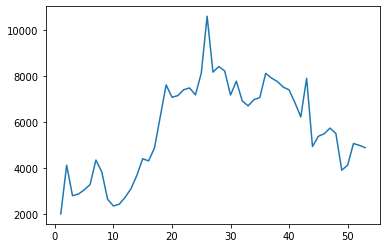

In [ ]:
plt.plot(plotlogs['semana'], plotlogs['u_p_semana'])

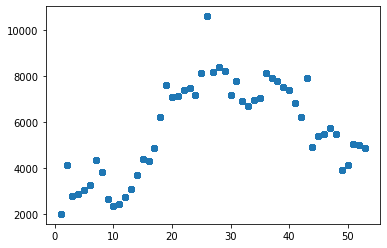

In [ ]:
plt.scatter(logs['semana'], logs['u_p_semana'], )

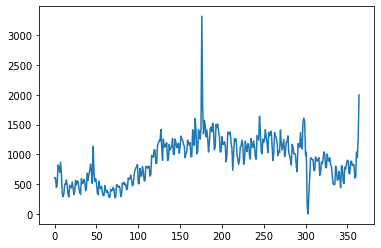

In [ ]:
plotlogs=logs.groupby('dia').agg({'u_p_dia':'mean'}).reset_index()
plt.plot(plotlogs['dia'], plotlogs['u_p_dia'], )

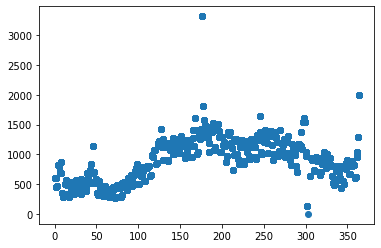

In [ ]:
plt.scatter(logs['dia'], logs['u_p_dia'], )

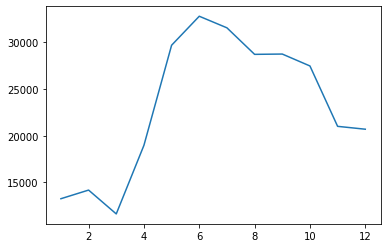

In [ ]:
plotlogs=logs.groupby('mes').agg({'u_p_mes':'mean'}).reset_index()
plt.plot(plotlogs['mes'], plotlogs['u_p_mes'], )

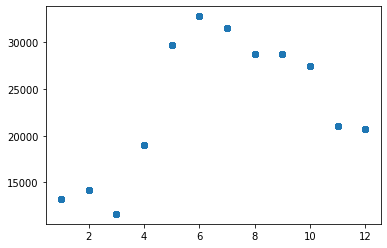

In [ ]:
plt.scatter(logs['mes'], logs['u_p_mes'], )

### Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).  
em média 1165 seções  
*um numero bem proximo da quantidade de usuarios, indicando que os usuarios não costumam retornar à Y.Afisha

<AxesSubplot:ylabel='Frequency'>

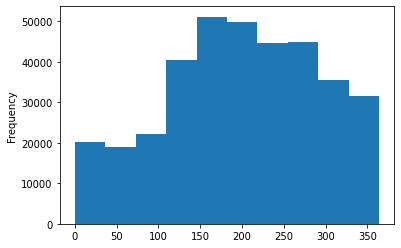

In [ ]:
logs['dia'].plot(kind='hist')

In [ ]:
logs['s_dia'].mean().round()

1165.0

### Que comprimento tem cada sessão?  
em média 643.0 segundos, ou seja pouco mais de 10 min
entretanto temos uma mediana bem abaixo (300)  o que significa que metade dos usuarios passaram menos de 5min


In [ ]:
logs["tempo''"].mean().round()

643.0

In [ ]:
logs["tempo''"].median().round()

300.0

In [ ]:
#logs["tempo''"].plot(kind='hist', bins=20)
#muitos outliers

<AxesSubplot:ylabel='Frequency'>

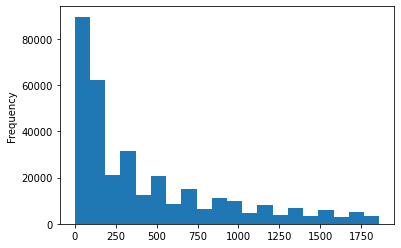

In [ ]:
outliers(logs,"tempo''")["tempo''"].plot(kind='hist', bins=20)

### com que frequencia os usuários voltam?

acessos por cliente:  1.5751482453795214  
clientes que retornaram: 52128  
clientes que não retornaram:  176041  
taxa de retorno: aprox. 22%


uma taxa bem baixa, por que será?

In [ ]:
freq=logs.groupby('Uid').agg({'inicio': 'count'}).reset_index()
freq=freq.rename(columns={'inicio':'qnt'})
freq


,Uid,qnt
0,11863502262781,1
1,49537067089222,1
2,297729379853735,1
3,313578113262317,3
4,325320750514679,2
...,...,...
228164,18446403737806311543,1
228165,18446424184725333426,1
228166,18446556406699109058,1
228167,18446621818809592527,2


In [ ]:
print("acessos por cliente: ",freq['qnt'].mean())

print("clientes que retornaram:",freq[freq['qnt']>1]['Uid'].count(),
      " clientes que não retornaram ",freq[freq['qnt']==1]['Uid'].count(),
      " taxa de retorno " ,freq[freq['qnt']>1]['Uid'].count()/freq['Uid'].count())

acessos por cliente:  1.5751482453795214
clientes que retornaram: 52128  clientes que não retornaram  176041  taxa de retorno  0.2284622363248294


vejamos por coorte o retorno dos usuarios:

In [ ]:
logs['tempovidacoorte']=logs['mes']-logs['mes_a1']

In [ ]:
coortes = (
    logs.groupby(['mes_a1', 'tempovidacoorte'])
    .agg({'Uid': 'nunique'})
    .reset_index()
) 
coortes

,mes_a1,tempovidacoorte,Uid
0,1,0,13259
1,1,1,1043
2,1,2,713
3,1,3,814
4,1,4,909
...,...,...,...
73,10,1,861
74,10,2,557
75,11,0,15709
76,11,1,760


In [ ]:
contagem_de_usuarios=coortes[coortes['tempovidacoorte']==0].reset_index()
contagem_de_usuarios=contagem_de_usuarios.drop(['tempovidacoorte','index'],axis=1)
contagem_de_usuarios.columns=['mes_a1','usuarios_do_coorte']
contagem_de_usuarios

,mes_a1,usuarios_do_coorte
0,1,13259
1,2,13140
2,3,10181
3,4,16704
4,5,25977
5,6,27248
6,7,25268
7,8,22624
8,9,22197
9,10,20589


In [ ]:
coorte2=pd.merge(coortes,contagem_de_usuarios, on='mes_a1')
coorte2['retencao']=(coorte2['Uid']/coorte2['usuarios_do_coorte'])*100
coorte2

,mes_a1,tempovidacoorte,Uid,usuarios_do_coorte,retencao
0,1,0,13259,13259,100.000000
1,1,1,1043,13259,7.866355
2,1,2,713,13259,5.377479
3,1,3,814,13259,6.139226
4,1,4,909,13259,6.855721
...,...,...,...,...,...
73,10,1,861,20589,4.181845
74,10,2,557,20589,2.705328
75,11,0,15709,15709,100.000000
76,11,1,760,15709,4.837991


In [ ]:
coorte_acesso_retencao=coorte2.pivot_table(
    index='mes_a1',
    columns='tempovidacoorte',
    values='retencao',
    aggfunc='sum',
)

essa será a porcentagem de retenção, mes a mes, por coorte:

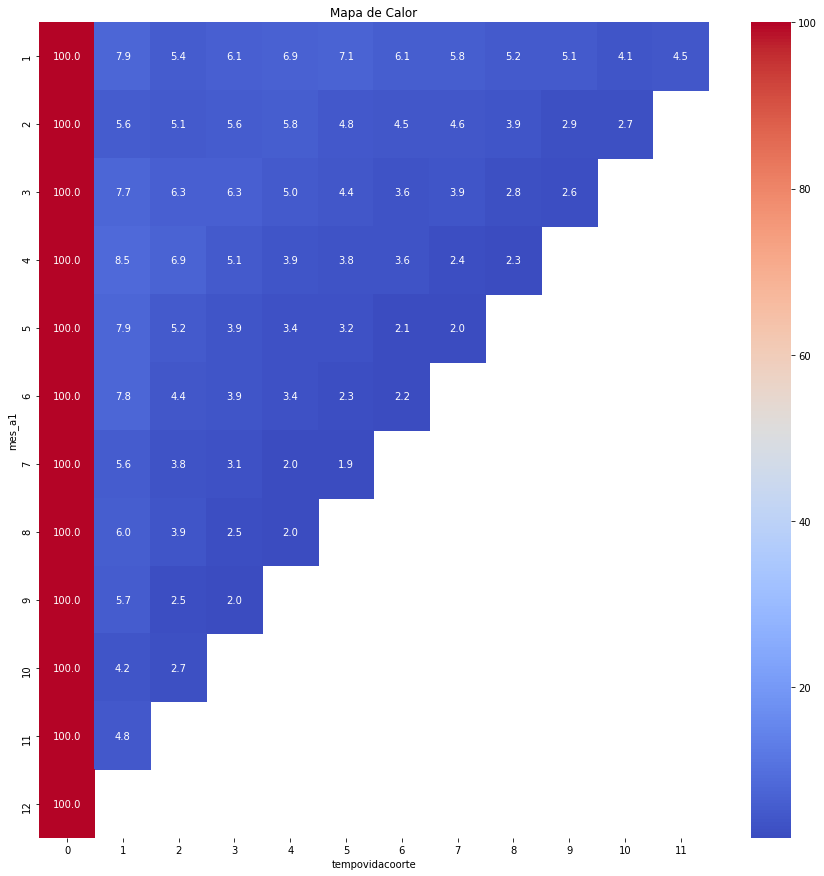

In [ ]:

plt.figure(figsize=(15, 15))
sn.heatmap(coorte_acesso_retencao, annot=True, cmap='coolwarm', cbar=True, fmt = '.1f')

plt.title('Mapa de Calor')
plt.show()

vejamos também em numeros absolutos:

In [ ]:

coorte_acesso=logs.pivot_table(index='mes_a1', columns='mes',values='Uid',aggfunc='nunique')
coorte_acesso

mes,1,2,3,4,5,6,7,8,9,10,11,12
mes_a1,,,,,,,,,,,,
1,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2,NaN,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0
3,NaN,NaN,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0
4,NaN,NaN,NaN,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0
5,NaN,NaN,NaN,NaN,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0
6,NaN,NaN,NaN,NaN,NaN,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0
7,NaN,NaN,NaN,NaN,NaN,NaN,25268.0,1410.0,960.0,786.0,512.0,481.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22624.0,1351.0,890.0,565.0,458.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22197.0,1267.0,565.0,446.0


aqui vemos que:  
1 o melhor coorte é o do sexto mês.  
2 o acesso tende a cair muito no segundo mes de cada coorte,  
3 mas se mantem depois disso.  
concluo que muitos acessam para conhecer uma vez e logo vão embora, mas os que ficam acessam com frequencia.  
vamos ver se é verdade:

In [ ]:
freq[freq['qnt']>1]['Uid'].mean()

9.186781145061657e+18

teoria confirmada, dos que acessaram mais de uma vez, tem uma media de 9,1 acessos.

por curiosidade
__qual a taxa de conversão?__
16%

In [ ]:
compras['Uid'].nunique() / logs['Uid'].nunique()


0.16000859012398705

## compras/vendas:

__2. Vendas__   
    ◦ Quando as pessoas começam a comprar?     
    ◦ Quantos pedidos os clientes fazem durante um determinado período de tempo?  
    ◦ Qual é o volume médio de uma compra?  
    ◦ Quanto dinheiro eles trazem para a empresa (LTV)?  

### Quando as pessoas começam a comprar?  
em media os clientes que conheceram o produto nos primeiros meses demoraram mais tempo para comprar alguma coisa, mas isso pode ser em razão de a pesquisa so ter um ano. Certamente se ela continuasse, os outros meses teriam a media aumentada em razão de usuarios que passam a comprar depois de 01/07/2018  
Aimda assim, é necessário concluir que a grande maioria das compras está no primeiro mês do usuario, conforme nos mostra o grafico coorte_compras.
a media de conversão é de: 18 dias para todos os dados, mas é proxima a 40 dias quando levado em conta apenas os usuarios dos dois primeiros meses.
Além disso, não nos esqueçamos que a taxa de conversão é de apenas 16%.

In [ ]:
compras['conversao'].mean()

17.605353029942023

In [ ]:
conversãopormes=compras.pivot_table(index='acesso1m',values='conversao',aggfunc='mean').reset_index()
conversãopormes




,acesso1m,conversao
0,1,38.573106
1,2,41.173582
2,3,32.503046
3,4,23.508287
4,5,16.227178
5,6,14.271555
6,7,9.863506
7,8,8.048137
8,9,5.292109
9,10,2.903526


__vejamos as compras ao longo do tempo:__

In [ ]:
compras

,data,compra,Uid,dia,mes,semana,acesso1,compra1,conversao,compra1m,acesso1m
0,2017-06-01,17.00,10329302124590727494,1,1,1,2017-06-01,2017-06-01,0,1,1
1,2017-06-01,0.55,11627257723692907447,1,1,1,2017-06-01,2017-06-01,0,1,1
2,2017-06-01,0.37,17903680561304213844,1,1,1,2017-06-01,2017-06-01,0,1,1
3,2017-06-01,0.55,16109239769442553005,1,1,1,2017-06-01,2017-06-01,0,1,1
4,2017-06-01,0.37,14200605875248379450,1,1,1,2017-06-01,2017-06-01,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
50359,2018-05-31,4.64,12296626599487328624,365,12,53,2018-05-31,2018-05-31,0,12,12
50360,2018-05-31,5.80,11369640365507475976,365,12,53,2018-05-31,2018-05-31,0,12,12
50361,2018-05-31,0.30,1786462140797698849,365,12,53,2018-05-31,2018-05-31,0,12,12
50362,2018-05-31,3.67,3993697860786194247,365,12,53,2017-10-23,2018-05-31,220,12,5


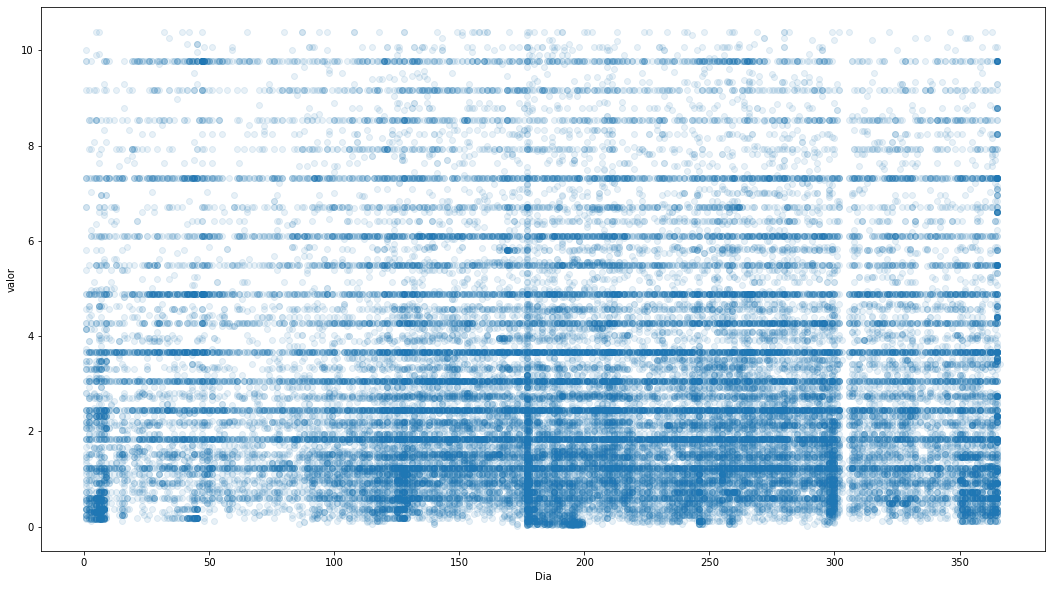

In [ ]:
compras_sem_outliers=outliers(compras, 'compra')
plt.figure(figsize=(18, 10))
plt.xlabel('Dia')
plt.ylabel('valor')
plt.scatter(compras_sem_outliers['dia'], compras_sem_outliers['compra'],alpha=0.1)

__vamos fazer coortes segundo o mes do 1º acesso para ver a quantidade de compradorese a media do tempo de conversão, conforme o passar do tempo__

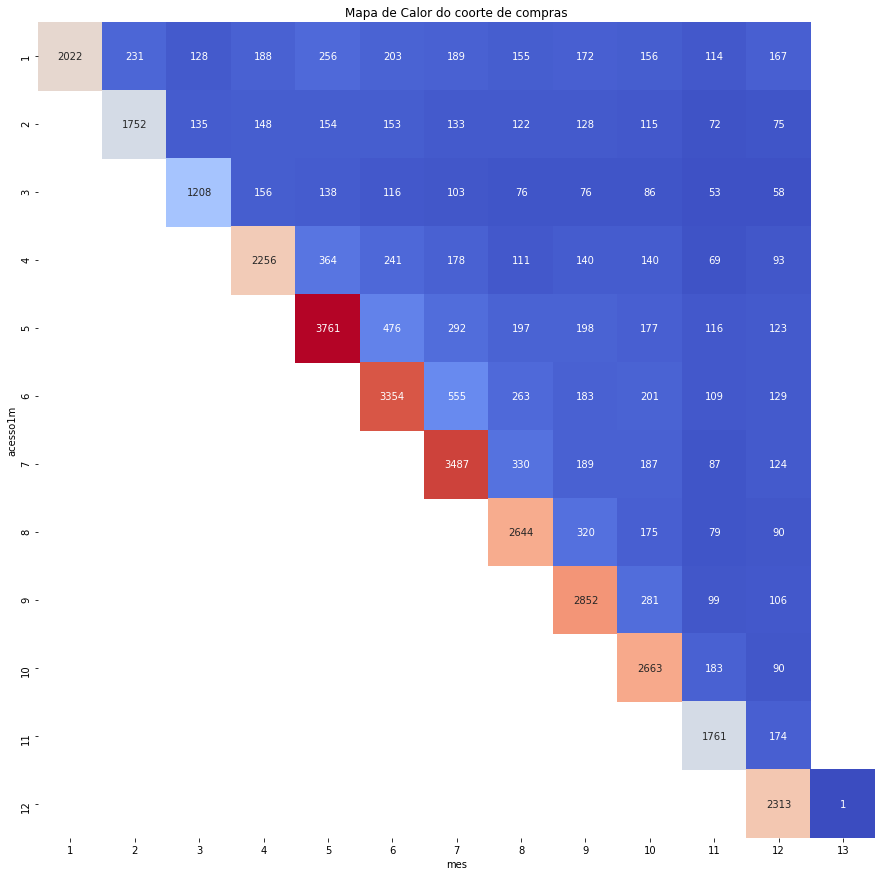

In [ ]:
coorte_compras=compras.pivot_table(index='acesso1m', columns='mes',values='Uid',aggfunc='nunique')
plt.figure(figsize=(15, 15))
sn.heatmap(coorte_compras, annot=True, cmap='coolwarm',cbar=False, fmt = '.0f')

plt.title('Mapa de Calor do coorte de compras')
plt.show()

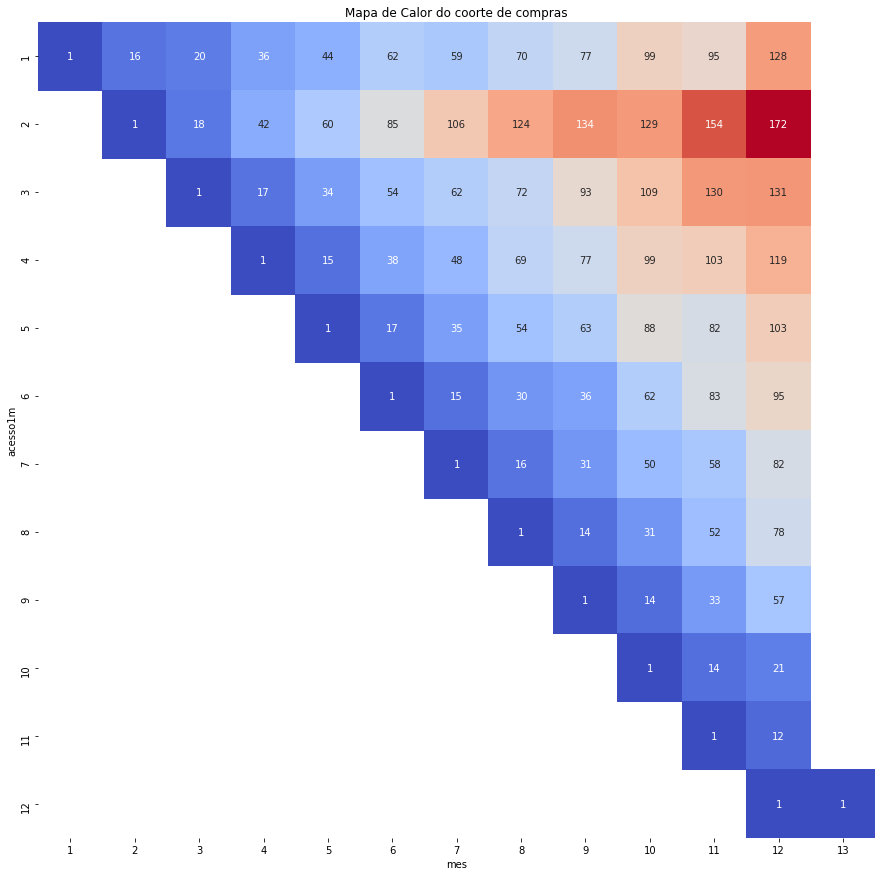

In [ ]:
coorte_compra_conversao=compras.pivot_table(index='acesso1m', columns='mes',values='conversao',aggfunc='mean')
plt.figure(figsize=(15, 15))
sn.heatmap(coorte_compra_conversao, annot=True, cmap='coolwarm',cbar=False, fmt = '.0f')

plt.title('Mapa de Calor do coorte de compras')
plt.show()

### Qual é o volume médio de uma compra? 
\\$ 5,00
além disso grande maioria das compras são em valores abaixo de 10 reais.
os clientes do mes 4 (setembro) são os que em media fazem compras mais elevadas, mesmo se desconsiderarmos os valores atipicos  
os que dezembro apresentaram alguns valores atipicos que subiram muito a media, mas sem eles os valores são bem baixos.
em geral os clientes dos 4 primeiros meses apresentam melhores compras.

In [ ]:
compras['compra'].mean()

5.004709713287269

<AxesSubplot:ylabel='Frequency'>

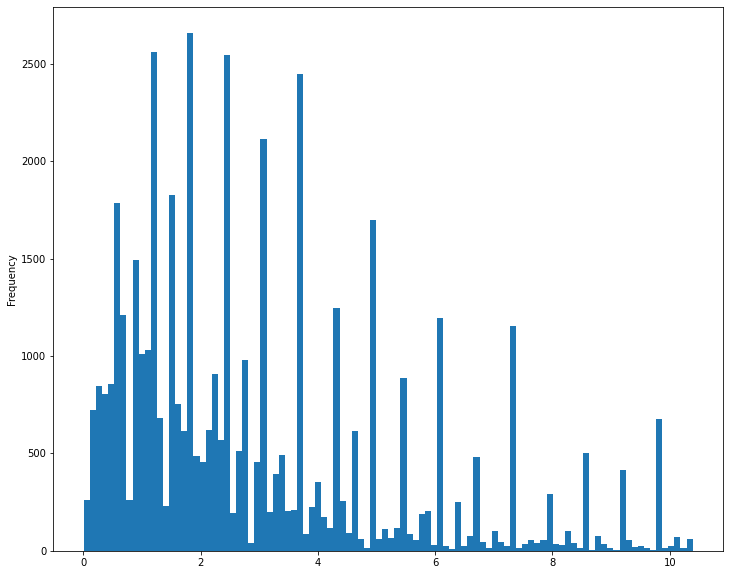

In [ ]:
compras_sem_outliers['compra'].plot(kind='hist', bins= 100, figsize=(12,10))    
#interessante! temos valores fixos como opções de compras, temos de diminuir o bins

<AxesSubplot:ylabel='Frequency'>

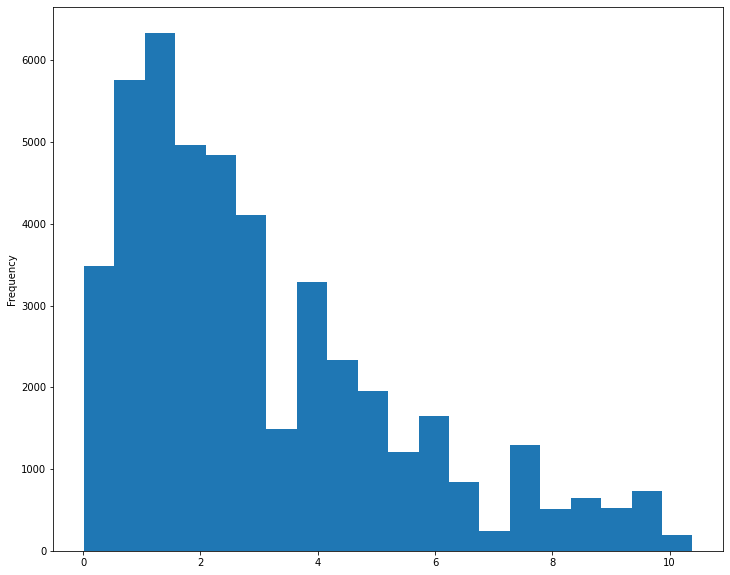

In [ ]:
compras_sem_outliers['compra'].plot(kind='hist', bins= 20, figsize=(12,10))    
#agora sim temos uma noção melhor dos valores de cada compra, muitas abaixo de 3 dolares

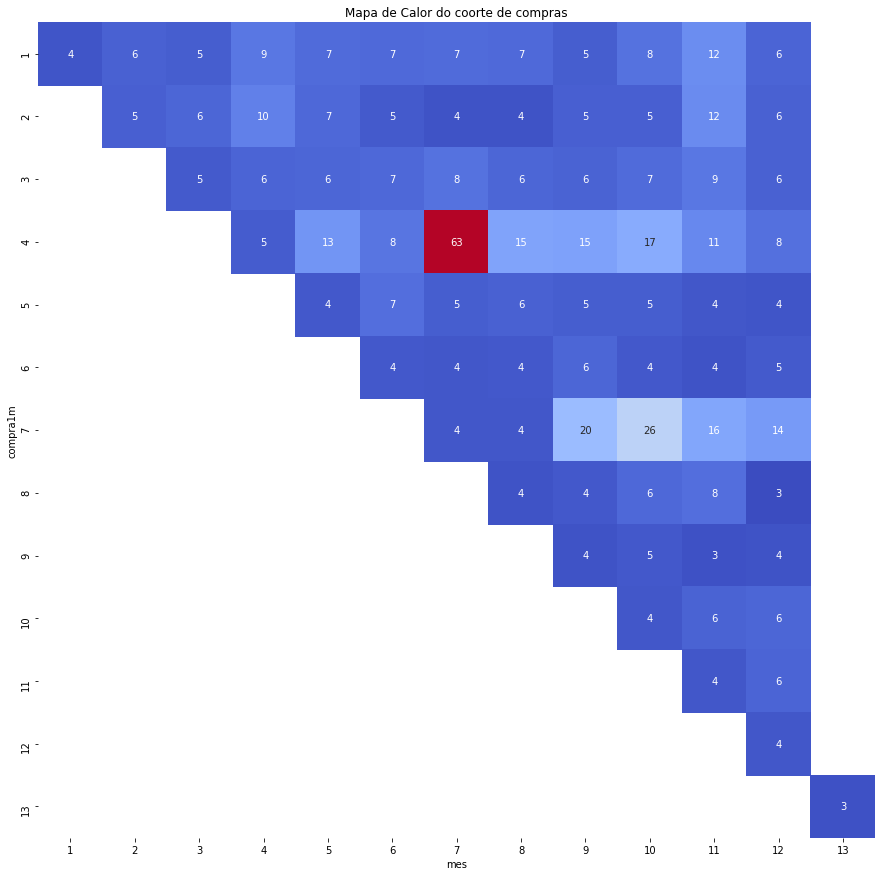

In [ ]:
coorte_compra_media=compras.pivot_table(index='compra1m', columns='mes',values='compra',aggfunc='mean')
plt.figure(figsize=(15, 15))
sn.heatmap(coorte_compra_media, annot=True, cmap='coolwarm',cbar=False, fmt = '.0f')

plt.title('Mapa de Calor do coorte de compras')
plt.show()

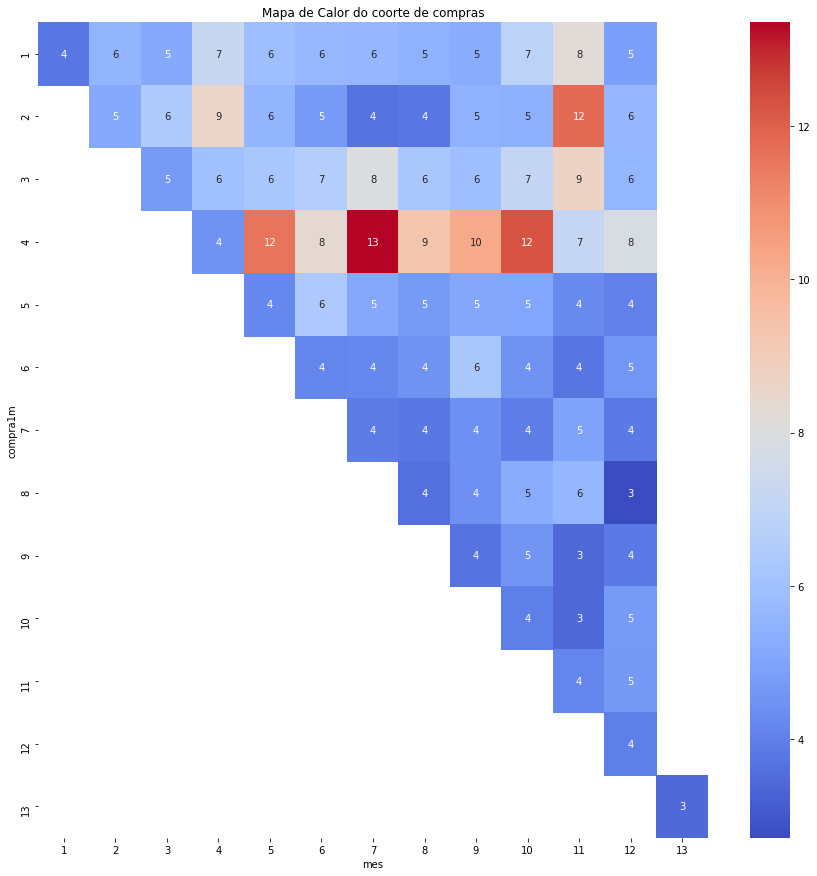

In [ ]:

comprasbaixas=compras[compras['compra'] < 100]
mediacomprasbaixas=comprasbaixas.pivot_table(index='compra1m', columns='mes',values='compra',aggfunc='mean')
plt.figure(figsize=(15, 15))
sn.heatmap(mediacomprasbaixas, annot=True, cmap='coolwarm',cbar=True, fmt = '.0f')

plt.title('Mapa de Calor do coorte de compras')
plt.show()    


__vejamos as vendas ao longo do tempo__

### Quantos pedidos os clientes fazem durante um determinado período de tempo?

em media são feitas 3874 compras por mês
a tendencia é que a maioria das compras são no primeiro mes de uso.
do segundo mês em diante se mantem bem mais baixo mas estavel.
cada cliente compra 1,3 vezes, em media.
dos que compram mais de uma vez, a media de compras é 3,2 compras por cliente

a exceção são os primeiros compradores, que se mantem com niveis semelhantes ou até melhores desde o segndo mês.
Alem disso o acumulo de clientes parece fazer diferença, pois os numeros só passam de 5mil compras apos setembro(4º mes), se mantendo relativamente estavel a partir dai.
por fim só 17% dos compradores fazem mais de uma compra.

In [ ]:
compraspormes=compras.groupby('mes').agg({'Uid':'count'}).reset_index()
compraspormes.columns=['mes','compras']
compraspormes

,mes,compras
0,1,2353
1,2,2362
2,3,1803
3,4,3383
4,5,5677
5,6,5644
6,7,6206
7,8,4721
8,9,5280
9,10,5325


In [ ]:
compraspormes['compras'].mean()

3874.153846153846

In [ ]:
freq_compra=compras.groupby('Uid').agg({'data': 'count'}).reset_index()
freq_compra=freq_compra.rename(columns={'data':'qnt'})
print("compras por comprador: ",freq_compra['qnt'].mean())

print("clientes que retornaram:",freq_compra[freq_compra['qnt']>1]['Uid'].count(),
      " clientes que não retornaram ",freq_compra[freq_compra['qnt']==1]['Uid'].count(),
      " taxa de retorno " ,freq_compra[freq_compra['qnt']>1]['Uid'].count()/freq_compra['Uid'].count())

compras por comprador:  1.3794954668711825
clientes que retornaram: 6283  clientes que não retornaram  30226  taxa de retorno  0.172094552028267


In [ ]:
freq_compra[freq_compra['qnt']>1]['qnt'].mean()

3.2051567722425593

Text(0.5, 1.0, 'Histograma do Dia do Ano')

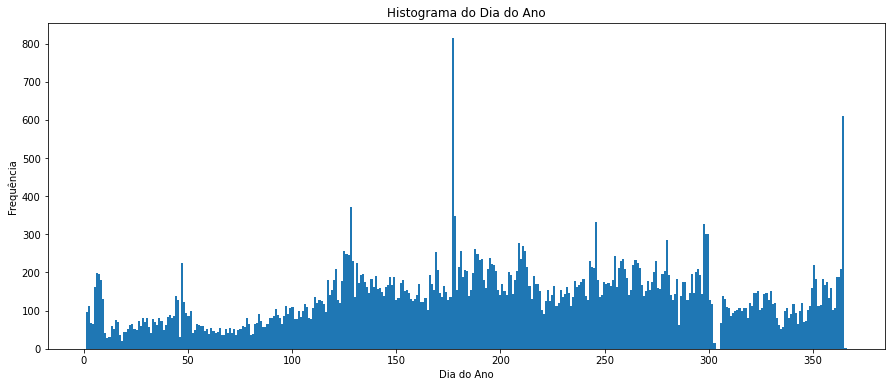

In [ ]:
#agora vamos ver as datas das compras

compras['dia'].plot(kind='hist', bins= 366, figsize=(15,6)) 

plt.xlabel('Dia do Ano')
plt.ylabel('Frequência')
plt.title('Histograma do Dia do Ano')
#temos dias de intensa atividade de compras, talvez dias de promoções?

Text(0.5, 1.0, 'Histograma da semana')

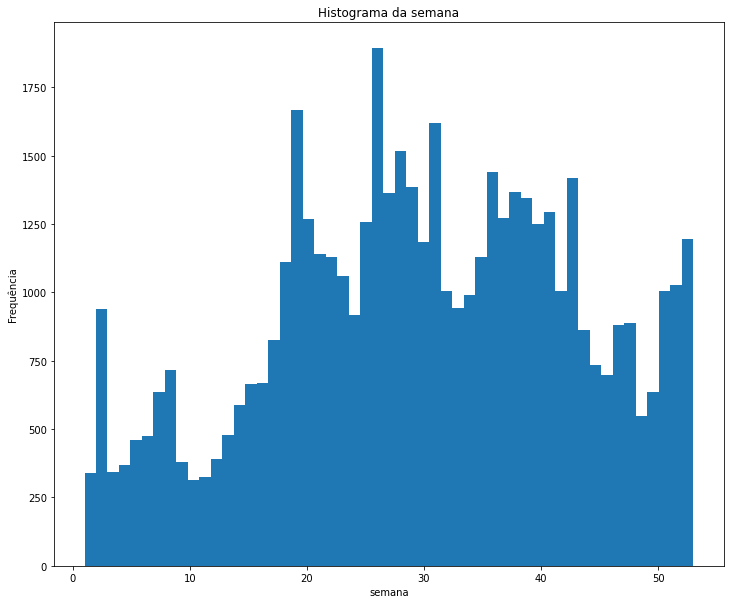

In [ ]:
compras['semana'].plot(kind='hist', bins= 53, figsize=(12,10))    

plt.xlabel('semana')
plt.ylabel('Frequência')
plt.title('Histograma da semana')


__aqui observamos o gradual aumento de vendas nas primeiras semanas, até alcançar o primeiro pico e se estabilizar entre picos e vales semelhantes entre si__

__vejamos um mapa de calor da quantidade de compras__

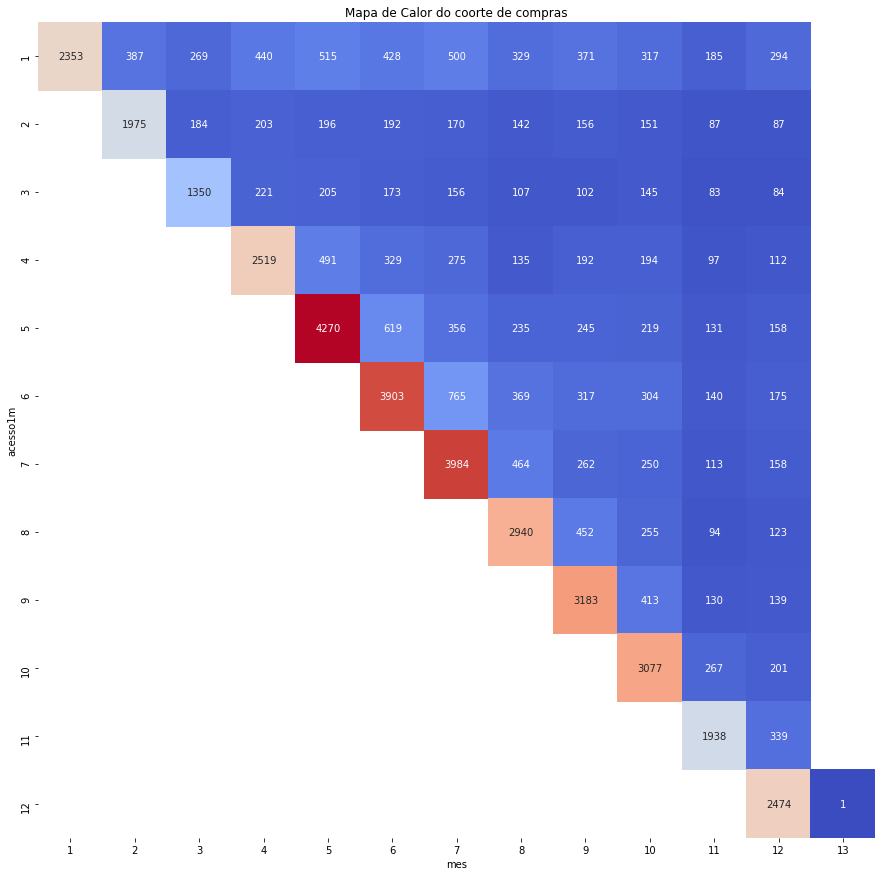

In [ ]:
coorte_compra_acesso_qnt=compras.pivot_table(index='acesso1m', columns='mes',values='compra',aggfunc='count')
plt.figure(figsize=(15, 15))
sn.heatmap(coorte_compra_acesso_qnt, annot=True, cmap='coolwarm',cbar=False, fmt = '.0f')

plt.title('Mapa de Calor do coorte de compras')
plt.show()

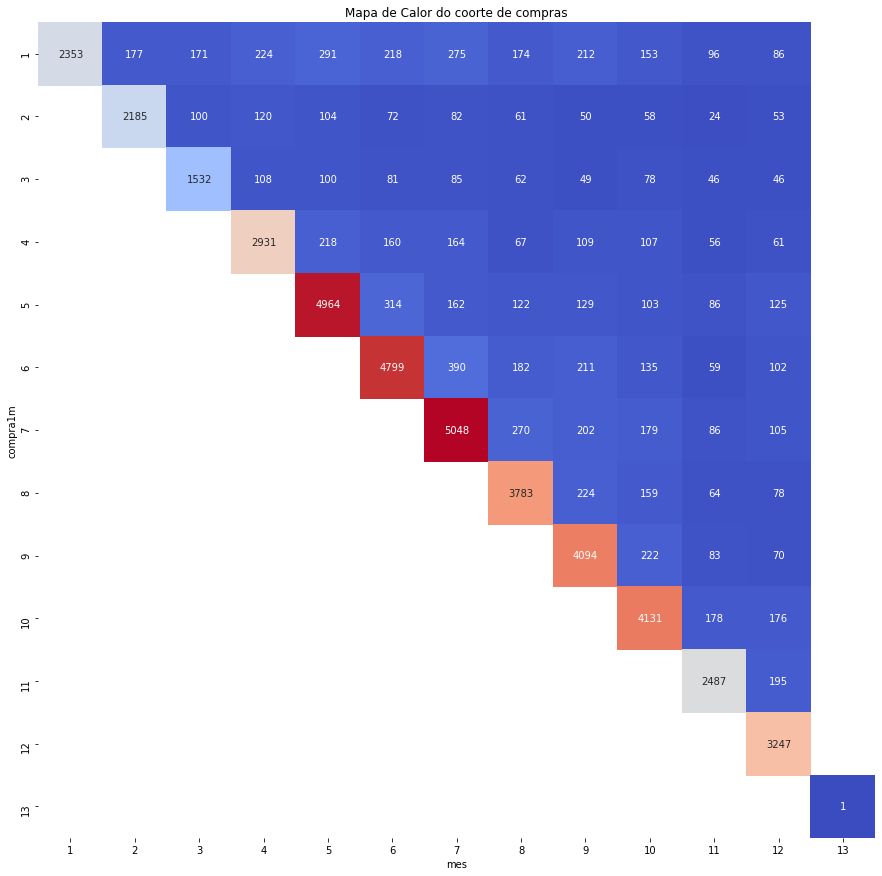

In [ ]:
coorte_compra_qnt=compras.pivot_table(index='compra1m', columns='mes',values='compra',aggfunc='count')
plt.figure(figsize=(15, 15))
sn.heatmap(coorte_compra_qnt, annot=True, cmap='coolwarm',cbar=False, fmt = '.0f')

plt.title('Mapa de Calor do coorte de compras')
plt.show()

In [ ]:
compras

,data,compra,Uid,dia,mes,semana,acesso1,compra1,conversao,compra1m,acesso1m
0,2017-06-01,17.00,10329302124590727494,1,1,1,2017-06-01,2017-06-01,0,1,1
1,2017-06-01,0.55,11627257723692907447,1,1,1,2017-06-01,2017-06-01,0,1,1
2,2017-06-01,0.37,17903680561304213844,1,1,1,2017-06-01,2017-06-01,0,1,1
3,2017-06-01,0.55,16109239769442553005,1,1,1,2017-06-01,2017-06-01,0,1,1
4,2017-06-01,0.37,14200605875248379450,1,1,1,2017-06-01,2017-06-01,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
50359,2018-05-31,4.64,12296626599487328624,365,12,53,2018-05-31,2018-05-31,0,12,12
50360,2018-05-31,5.80,11369640365507475976,365,12,53,2018-05-31,2018-05-31,0,12,12
50361,2018-05-31,0.30,1786462140797698849,365,12,53,2018-05-31,2018-05-31,0,12,12
50362,2018-05-31,3.67,3993697860786194247,365,12,53,2017-10-23,2018-05-31,220,12,5


In [ ]:
freq_compra=compras.groupby('Uid').agg({'data': 'count'}).reset_index()
freq_compra=freq_compra.rename(columns={'data':'qnt'})
print("compras por comprador: ",freq_compra['qnt'].mean())

print("clientes que retornaram:",freq_compra[freq_compra['qnt']>1]['Uid'].count(),
      " clientes que não retornaram ",freq_compra[freq_compra['qnt']==1]['Uid'].count(),
      " taxa de retorno " ,freq_compra[freq_compra['qnt']>1]['Uid'].count()/freq_compra['Uid'].count())

compras por comprador:  1.3794954668711825
clientes que retornaram: 6283  clientes que não retornaram  30226  taxa de retorno  0.172094552028267


__qualquer angulo que se veja a conclusão é a mesma: o usuário só compra uma vez__

### Quanto dinheiro os clientes(por coorte) trazem para a empresa (LTV)?  

total: \\$ 252.057,00;
sendo que apenas \\$ 31.977,00 foram de compras de valores abaixo de \\$ 100,00
media por mês= 19389; 
dezembro(7ºmês) é o que mais lucrou: \\$ 36.388,00
junho é o mes do coorte com maior lucro(tambem o de clientes mais antigos) \\$ 40026
10% de toda a receita veio de apenas 5 clientes
alem disso, percebe-se que os clientes que compram mais de uma vez tendem com o passar do tempo a fazer compras maiores, com destaque para os clientes que ingressaram no mes 1 e mes 4 ( junho e setembro)
entretanto se formos ignorar as compras em valores excessivos, encontramos os 3 primeiros coortes como os com as melhores medias de valor de compra.

dinheiro dos clientes(por coorte):  
mes / valor    
1.......40026.05  
2.......17812.11  
3.......13461.87  
4.......33682.56  
5.......27857.69  
6.......24426.72  
7.......31157.85  
8.......14546.82  
9.......15061.29  
10......13770.16  
11......9882.55  
12......10371.53  

In [ ]:
compras['compra'].sum()



252057.2

In [ ]:
comprasbaixas=compras[compras['compra'] > 100]
comprasbaixas['compra'].sum()

31977.730000000003

In [ ]:
comprasmes=compras.groupby('mes')['compra'].sum()
comprasmes.mean()


19389.015384615246

In [ ]:
comprasmes

mes
1      9557.49
2     12539.47
3      8758.78
4     18345.51
5     27987.70
6     27069.93
7     36388.60
8     19417.13
9     25560.54
10    28834.59
11    16858.06
12    20735.98
13        3.42
Name: compra, dtype: float64

In [ ]:
valor_coorte=compras.pivot_table(index='acesso1m',values='compra',aggfunc='sum')
valor_coorte

,compra
acesso1m,
1,40026.05
2,17812.11
3,13461.87
4,33682.56
5,27857.69
6,24426.72
7,31157.85
8,14546.82
9,15061.29


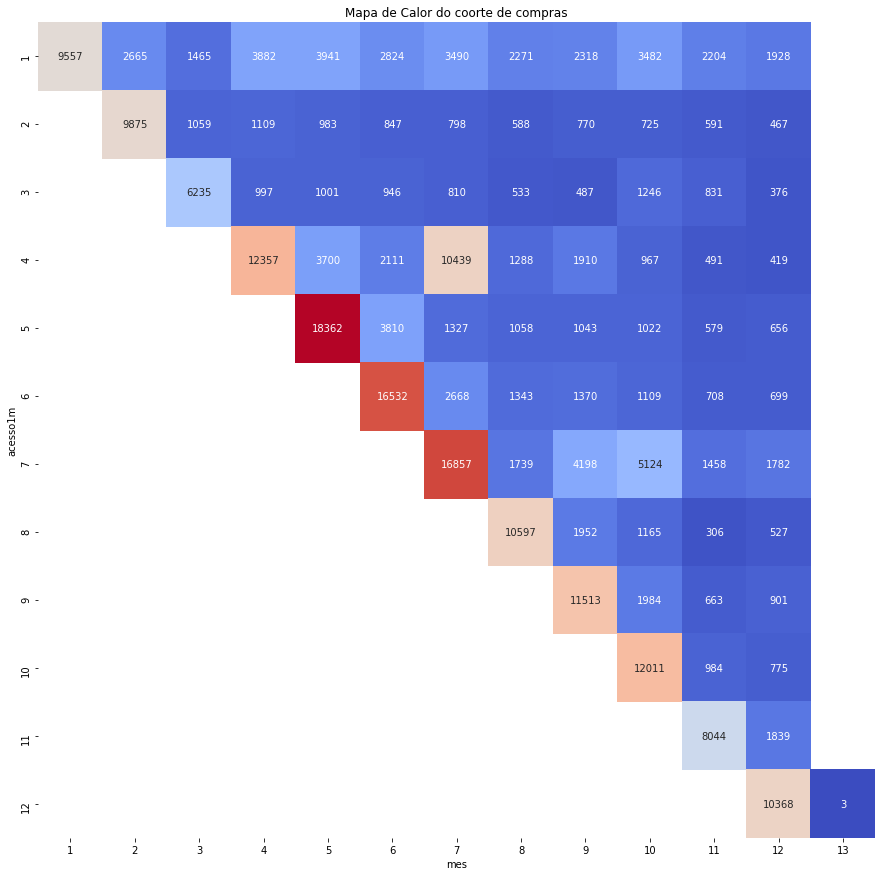

In [ ]:
coorte_compra_valor=compras.pivot_table(index='acesso1m', columns='mes',values='compra',aggfunc='sum')
plt.figure(figsize=(15, 15))
sn.heatmap(coorte_compra_valor, annot=True, cmap='coolwarm',cbar=False, fmt = '.0f')

plt.title('Mapa de Calor do coorte de compras')
plt.show()

In [ ]:
(compras.groupby("Uid").agg({'compra':'sum'}).reset_index()).sort_values(by='compra', ascending=False)


,Uid,compra
11007,5539673724080479777,11810.18
22062,11149926373378902217,10519.46
35656,17999372575896145244,1979.33
13450,6731421022966725351,1450.68
7200,3644482766749211722,1444.29
...,...,...
6059,3064658951185966160,0.03
19389,9806743452190840868,0.03
7120,3609489596216947970,0.03
22786,11519089408305428591,0.03


In [ ]:
compras[(compras['compra'] > 100) & (compras['mes'] == 7)]['Uid'].unique()



array([17999372575896145244, 10246903932085021612,  5539673724080479777,
        8539015707073391293, 11149926373378902217], dtype=uint64)

In [ ]:
compras[(compras['compra'] > 100) & (compras['mes'] == 7)]['compra'].sum()

9826.240000000002

In [ ]:
milionarios=[17999372575896145244, 10246903932085021612,  5539673724080479777,
        8539015707073391293, 11149926373378902217]
milioes=compras[compras['Uid'].isin(milionarios)]

milioes['compra'].sum()

26086.34

In [ ]:
compras_sem_outliers=outliers(compras, 'compra')

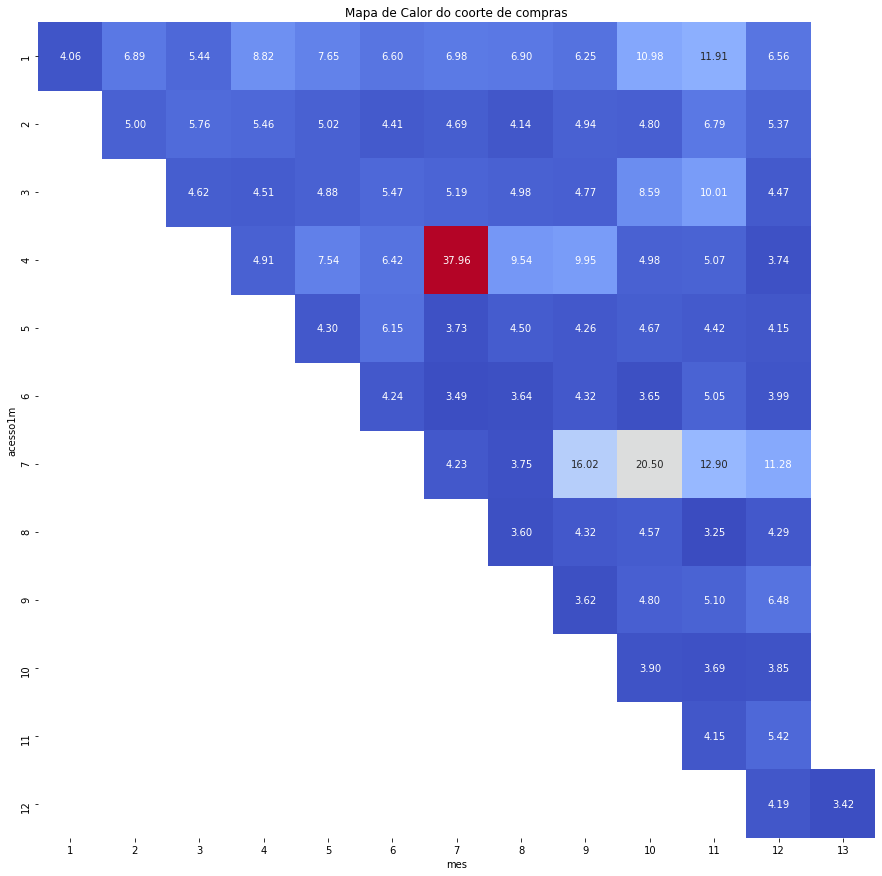

In [ ]:
coorte_compra_media_valor=compras.pivot_table(index='acesso1m', columns='mes',values='compra',aggfunc='mean')
plt.figure(figsize=(15, 15))
sn.heatmap(coorte_compra_media_valor, annot=True, cmap='coolwarm',cbar=False, fmt = '.2f')

plt.title('Mapa de Calor do coorte de compras')
plt.show()

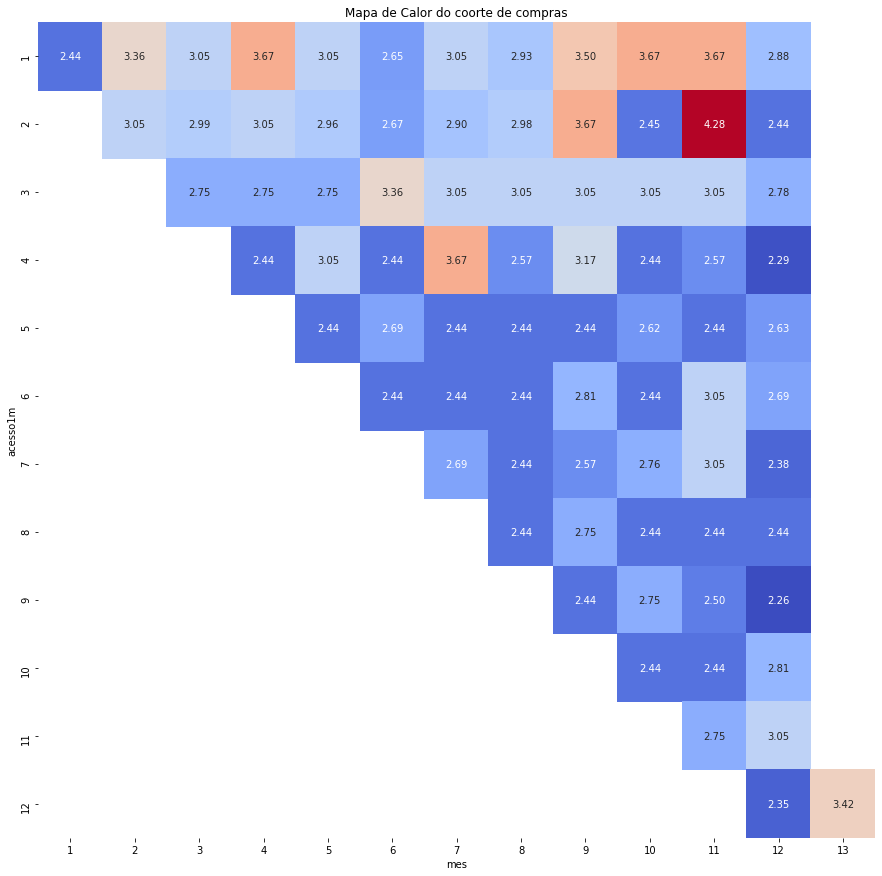

In [ ]:
coorte_compra_media_valor=compras.pivot_table(index='acesso1m', columns='mes',values='compra',aggfunc='median')
plt.figure(figsize=(15, 15))
sn.heatmap(coorte_compra_media_valor, annot=True, cmap='coolwarm',cbar=False, fmt = '.2f')

plt.title('Mapa de Calor do coorte de compras')
plt.show()

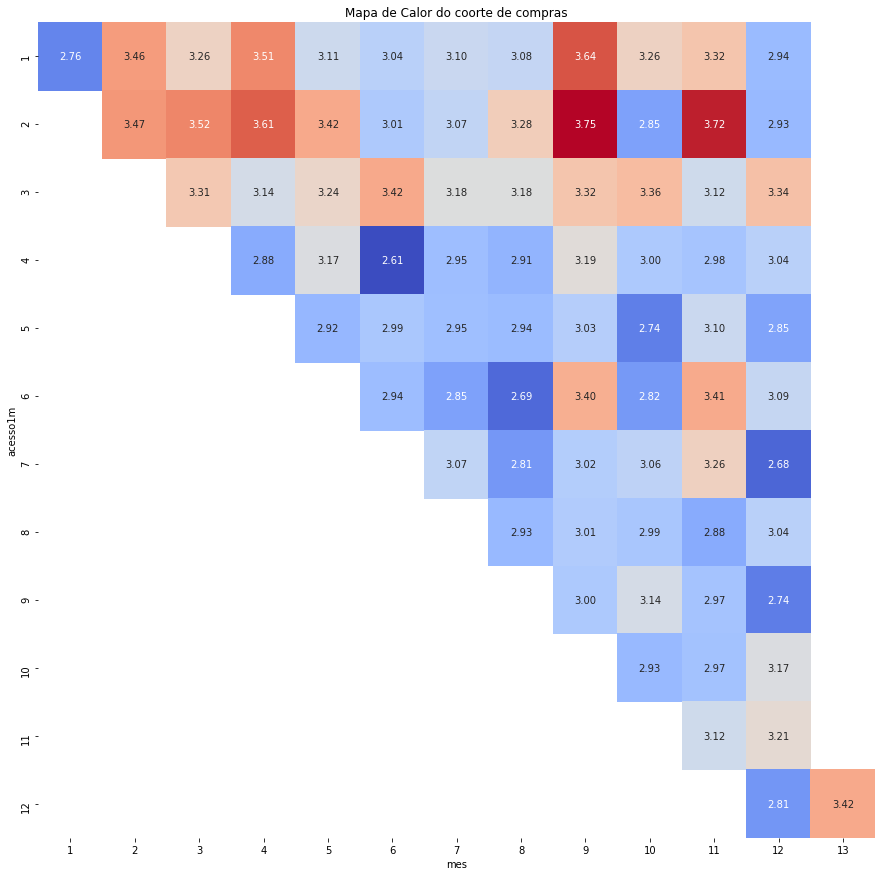

In [ ]:
coorte_compra_media_valor=compras_sem_outliers.pivot_table(index='acesso1m', columns='mes',values='compra',aggfunc='mean')
plt.figure(figsize=(15, 15))
sn.heatmap(coorte_compra_media_valor, annot=True, cmap='coolwarm',cbar=False, fmt = '.2f')

plt.title('Mapa de Calor do coorte de compras')
plt.show()

## Analisando custos

### Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo



In [ ]:
custos

,id_origem,data,custo,data_mes,mes
0,1,2017-06-01,75.20,2017-06-01,1
1,1,2017-06-02,62.25,2017-06-01,1
2,1,2017-06-03,36.53,2017-06-01,1
3,1,2017-06-04,55.00,2017-06-01,1
4,1,2017-06-05,57.08,2017-06-01,1
...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01,12
2538,10,2018-05-28,21.26,2018-05-01,12
2539,10,2018-05-29,11.32,2018-05-01,12
2540,10,2018-05-30,33.15,2018-05-01,12


#### total: \\$ 329.131,62


In [ ]:
custos['custo'].sum()

329131.62

#### por origem:
gastou-se muito na origem 3 \\$ 141.321 e bem pouco nas 9 e 10 (5.500 para cada)

In [ ]:
custos_origem=custos.groupby('id_origem')['custo'].sum().reset_index()
custos_origem

,id_origem,custo
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


Text(0, 0.5, 'valor total')

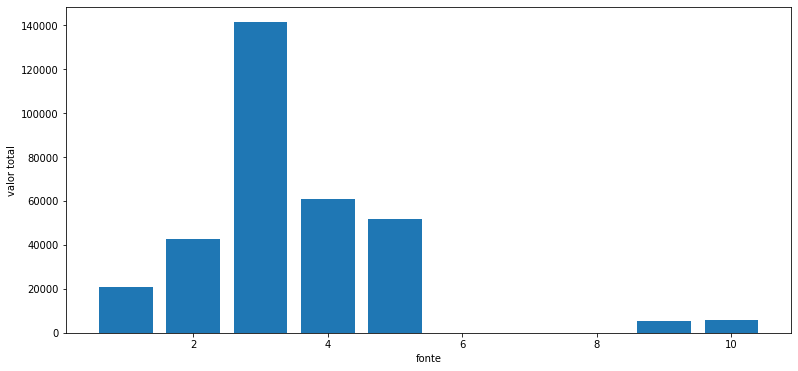

In [ ]:
plt.figure(figsize=(13,6))
plt.bar(custos_origem['id_origem'],custos_origem['custo'])
plt.xlabel('fonte')
plt.ylabel('valor total')


In [ ]:
custos

,id_origem,data,custo,data_mes,mes
0,1,2017-06-01,75.20,2017-06-01,1
1,1,2017-06-02,62.25,2017-06-01,1
2,1,2017-06-03,36.53,2017-06-01,1
3,1,2017-06-04,55.00,2017-06-01,1
4,1,2017-06-05,57.08,2017-06-01,1
...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01,12
2538,10,2018-05-28,21.26,2018-05-01,12
2539,10,2018-05-29,11.32,2018-05-01,12
2540,10,2018-05-30,33.15,2018-05-01,12


In [ ]:
custos_origem__mes=custos.pivot_table(index=['id_origem','mes'], values='custo',aggfunc='sum')

In [ ]:
custos_origem__mes

custo
id_origem mes         
1         1    1125.61
          2    1072.88
          3     951.81
          4    1502.01
          5    2315.75
...                ...
10        8     614.35
          9     480.88
          10    526.41
          11    388.25
          12    409.86

[84 rows x 1 columns]

In [ ]:
id=custos['id_origem'].unique()
id=[ 1,  2,  3,  4,  5,  9, 10]

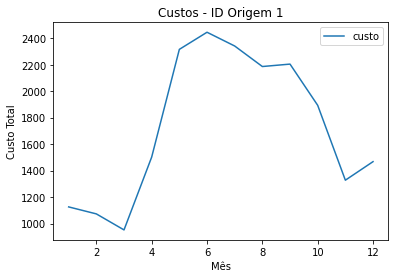

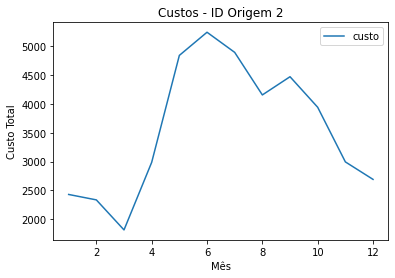

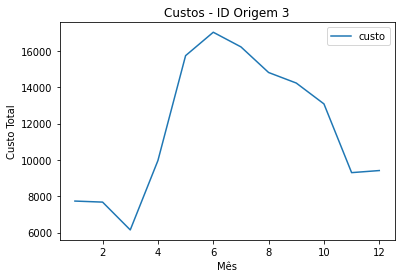

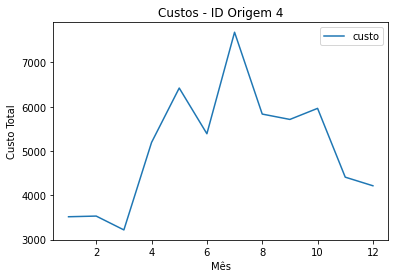

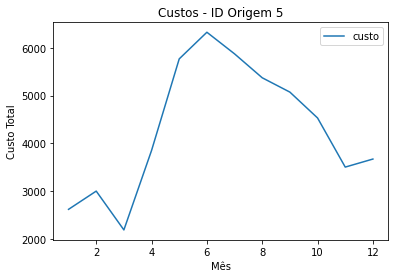

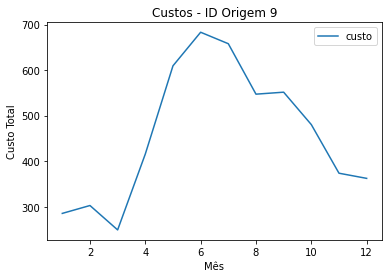

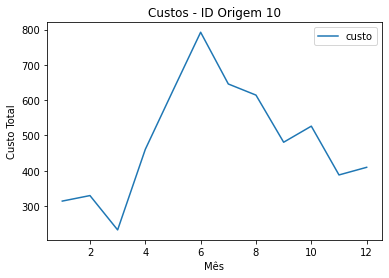

In [ ]:
for num in id:
    a=custos[custos['id_origem']==num]
    plotdf=a.pivot_table(index=['mes'], values='custo',aggfunc='sum')
    
    plotdf.plot()
    plt.title(f'Custos - ID Origem {num}')
    plt.xlabel('Mês')
    plt.ylabel('Custo Total')
    plt.show()


In [ ]:
custos_origem__mes

custo
id_origem mes         
1         1    1125.61
          2    1072.88
          3     951.81
          4    1502.01
          5    2315.75
...                ...
10        8     614.35
          9     480.88
          10    526.41
          11    388.25
          12    409.86

[84 rows x 1 columns]

<AxesSubplot:xlabel='id_origem,mes'>

<Figure size 1080x720 with 0 Axes>

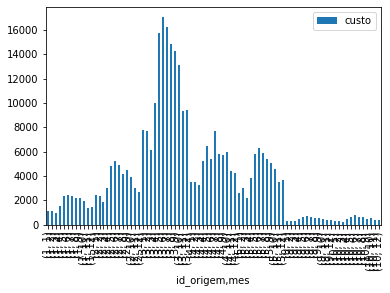

In [ ]:

plt.figure(figsize=(15,10))
custos_origem__mes.plot(kind='bar')

#### ao longo do tempo:
gastou-se sensivelmente menos nos 3 primeiros meses, mas a partir do 4 o valor sempre se manteve acima de 18k

In [ ]:
custosTempo=custossoutliers.groupby('dt').agg({'costs':'sum'}).reset_index()
custosTempom=custossoutliers.groupby('dtmx').agg({'costs':'sum'}).reset_index()

In [ ]:
custosTempom

,dtmx,costs
0,1,15955.53
1,2,16862.55
2,3,14790.54
3,4,18580.85
4,5,21469.93
5,6,20624.22
6,7,20232.97
7,8,19436.73
8,9,18819.88
9,10,18853.59


Text(0, 0.5, 'valor somado')

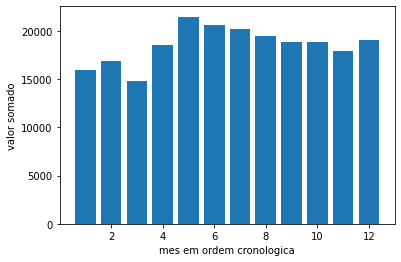

In [ ]:

plt.bar(custosTempom['dtmx'],custosTempom['costs'])
plt.xlabel('mes em ordem cronologica')
plt.ylabel('valor somado')


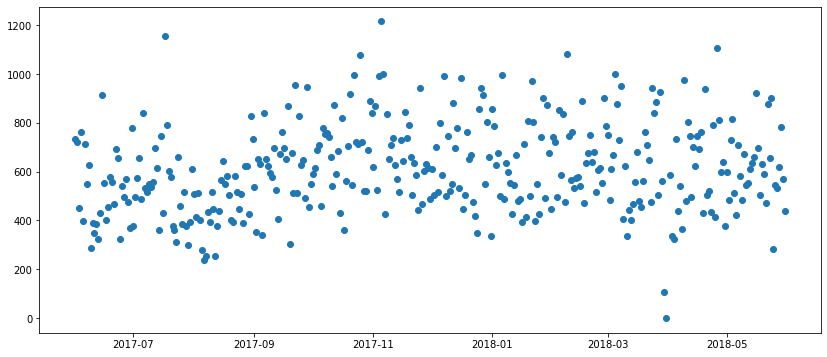

In [ ]:

plt.figure(figsize=(14, 6))
plt.scatter(custosTempo['dt'],custosTempo['costs'])


### Quanto custou a aquisição de clientes para cada origem?


em media  \\$ 1,2 para cada comprador.  
no total, cada comprados custou \\$ 9.  
aqui a origem e o valor em \\$ gasto por origem, para cada comprador:  
0  --  0.570634  
1  --  1.172479  
2  --  3.870871  
3  --  1.672837  
4  --  1.417653  
5  --  0.151127  
6  --  0.159481  




In [ ]:
custos_origem['custo/usuario']=custos_origem['custo']/logs['Uid'].nunique()
custos_origem['custo/comprador']=custos_origem['custo']/compras['Uid'].nunique()
custos_origem['custo/compra']=custos_origem['custo']/compras['Uid'].count()

custos_origem

,id_origem,custo,custo/usuario,custo/comprador,custo/compra
0,1,20833.27,0.091306,0.570634,0.413654
1,2,42806.04,0.187607,1.172479,0.849933
2,3,141321.63,0.619373,3.870871,2.806005
3,4,61073.60,0.267668,1.672837,1.212644
4,5,51757.10,0.226837,1.417653,1.027661
5,9,5517.49,0.024182,0.151127,0.109552
6,10,5822.49,0.025518,0.159481,0.115608


In [ ]:
custos_origem['custo/comprador']

0    0.570634
1    1.172479
2    3.870871
3    1.672837
4    1.417653
5    0.151127
6    0.159481
Name: custo/comprador, dtype: float64

In [ ]:
custos

,id_origem,data,custo,data_mes,mes
0,1,2017-06-01,75.20,2017-06-01,1
1,1,2017-06-02,62.25,2017-06-01,1
2,1,2017-06-03,36.53,2017-06-01,1
3,1,2017-06-04,55.00,2017-06-01,1
4,1,2017-06-05,57.08,2017-06-01,1
...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01,12
2538,10,2018-05-28,21.26,2018-05-01,12
2539,10,2018-05-29,11.32,2018-05-01,12
2540,10,2018-05-30,33.15,2018-05-01,12


In [ ]:
custos_origem['custo/comprador'].mean()

1.287868822951679

In [ ]:
custos_origem['custo/comprador'].sum()

9.015081760661753

In [ ]:
custo_mes_origem=custos.pivot_table(index='mes', columns='id_origem', values='custo', aggfunc='sum').reset_index()

In [ ]:
compradores_por_mes_numero=compras.groupby('mes')['Uid'].nunique().reset_index()

In [ ]:
compradores_por_mes_numero=compradores_por_mes_numero[compradores_por_mes_numero['mes']<13]
compradores_por_mes_numero=compradores_por_mes_numero.rename(columns={'Uid':'comp_mes'})

In [ ]:
custo_mes_origemm=pd.merge(custo_mes_origem,compradores_por_mes_numero, on='mes')
custo_mes_origemm

,mes,1,2,3,4,5,9,10,comp_mes
0,1,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22,2022
1,2,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82,1983
2,3,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57,1471
3,4,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67,2748
4,5,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24,4673
5,6,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36,4543
6,7,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86,4937
7,8,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35,3898
8,9,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88,4258
9,10,1893.09,3943.14,13080.85,5961.87,4529.62,480.29,526.41,4181


In [ ]:
custo_mes_origem2=custo_mes_origemm.divide(custo_mes_origemm['comp_mes'], axis=0)
custo_mes_origem2=custo_mes_origem2.drop('mes', axis=1)
custo_mes_origem2

,1,2,3,4,5,9,10,comp_mes
0,0.556682,1.200485,3.823764,1.738279,1.293828,0.141058,0.155401,1.0
1,0.541039,1.176556,3.870081,1.779995,1.511921,0.152567,0.166324,1.0
2,0.647050,1.231169,4.176438,2.187192,1.485574,0.169225,0.158103,1.0
3,0.546583,1.086485,3.625746,1.889469,1.400706,0.151245,0.167638,1.0
4,0.495560,1.036807,3.367695,1.374030,1.234196,0.130411,0.134226,1.0
5,0.538226,1.155113,3.747599,1.186181,1.392327,0.150381,0.174413,1.0
6,0.474215,0.992060,3.285299,1.555696,1.189492,0.133275,0.130820,1.0
7,0.560847,1.066634,3.799071,1.496355,1.378019,0.140369,0.157606,1.0
8,0.517727,1.050808,3.341606,1.341465,1.191008,0.129521,0.112936,1.0
9,0.452784,0.943109,3.128641,1.425944,1.083382,0.114874,0.125905,1.0


In [ ]:
compraspormes=compraspormes[compraspormes['mes']< 13]

In [ ]:
custosporcompras=pd.merge(custo_mes_origem,compraspormes, on='mes')
custosporcompras

,mes,1,2,3,4,5,9,10,compras
0,1,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22,2353
1,2,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82,2362
2,3,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57,1803
3,4,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67,3383
4,5,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24,5677
5,6,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36,5644
6,7,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86,6206
7,8,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35,4721
8,9,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88,5280
9,10,1893.09,3943.14,13080.85,5961.87,4529.62,480.29,526.41,5325


### Os investimentos valeram a pena? (ROI)

#### Calculando LTV

In [ ]:
compras_agrupradas_coorte = compras.groupby(
    ['compra1m', 'mes']
).agg({'compra': 'sum'}).reset_index()
compras_agrupradas_coorte=compras_agrupradas_coorte.rename(columns={'compra': 'receita'})
print(compras_agrupradas_coorte) 

    compra1m  mes   receita
0          1    1   9557.49
1          1    2    981.82
2          1    3    885.34
3          1    4   1931.30
4          1    5   2068.58
..       ...  ...       ...
74        10   12   1114.87
75        11   11  10600.69
76        11   12   1209.92
77        12   12  13925.76
78        13   13      3.42

[79 rows x 3 columns]


In [ ]:
usuarios_por_coorte = compras.groupby('compra1m').agg({'Uid': 'nunique'}).reset_index()
usuarios_por_coorte.columns = ['compra1m', 'n_usuario_coorte']
cp=pd.merge(compras_agrupradas_coorte,usuarios_por_coorte, on='compra1m')
cp

,compra1m,mes,receita,n_usuario_coorte
0,1,1,9557.49,2022
1,1,2,981.82,2022
2,1,3,885.34,2022
3,1,4,1931.30,2022
4,1,5,2068.58,2022
...,...,...,...,...
74,10,12,1114.87,3534
75,11,11,10600.69,2274
76,11,12,1209.92,2274
77,12,12,13925.76,2986


In [ ]:
cp['idade']=cp['mes']-cp['compra1m']
cp['ltv']=cp['receita']/cp['n_usuario_coorte']
cp

,compra1m,mes,receita,n_usuario_coorte,idade,ltv
0,1,1,9557.49,2022,0,4.726751
1,1,2,981.82,2022,1,0.485569
2,1,3,885.34,2022,2,0.437854
3,1,4,1931.30,2022,3,0.955143
4,1,5,2068.58,2022,4,1.023037
...,...,...,...,...,...,...
74,10,12,1114.87,3534,2,0.315470
75,11,11,10600.69,2274,0,4.661693
76,11,12,1209.92,2274,1,0.532067
77,12,12,13925.76,2986,0,4.663684


#### calculando CAC

In [ ]:
custo_mes=custos.groupby('mes')['custo'].sum().reset_index()

custo_mes=custo_mes.rename(columns={'compra1m':'acesso1m'})
custo_mes

compra_custo2=pd.merge(cp,custo_mes, on='acesso1m')
compra_custo2

In [ ]:
custo_mes

,mes,custo
0,1,18015.00
1,2,18240.59
2,3,14790.54
3,4,24368.91
4,5,36322.88
5,6,37907.88
6,7,38315.35
7,8,33518.52
8,9,32723.03
9,10,30415.27


In [ ]:
cp

,compra1m,mes,receita,n_usuario_coorte,idade,ltv
0,1,1,9557.49,2022,0,4.726751
1,1,2,981.82,2022,1,0.485569
2,1,3,885.34,2022,2,0.437854
3,1,4,1931.30,2022,3,0.955143
4,1,5,2068.58,2022,4,1.023037
...,...,...,...,...,...,...
74,10,12,1114.87,3534,2,0.315470
75,11,11,10600.69,2274,0,4.661693
76,11,12,1209.92,2274,1,0.532067
77,12,12,13925.76,2986,0,4.663684


In [ ]:
compra_custo=pd.merge(cp,custo_mes, left_on ='compra1m', right_on='mes')
compra_custo['cac'] = compra_custo['custo'] / compra_custo['n_usuario_coorte']
compra_custo

,compra1m,mes_x,receita,n_usuario_coorte,idade,ltv,mes_y,custo,cac
0,1,1,9557.49,2022,0,4.726751,1,18015.00,8.909496
1,1,2,981.82,2022,1,0.485569,1,18015.00,8.909496
2,1,3,885.34,2022,2,0.437854,1,18015.00,8.909496
3,1,4,1931.30,2022,3,0.955143,1,18015.00,8.909496
4,1,5,2068.58,2022,4,1.023037,1,18015.00,8.909496
...,...,...,...,...,...,...,...,...,...
73,10,11,1063.05,3534,1,0.300806,10,30415.27,8.606471
74,10,12,1114.87,3534,2,0.315470,10,30415.27,8.606471
75,11,11,10600.69,2274,0,4.661693,11,22289.38,9.801838
76,11,12,1209.92,2274,1,0.532067,11,22289.38,9.801838


#### finalmente calculando o ROMI

In [ ]:
compra_custo['romi'] = compra_custo['ltv'] / compra_custo['cac']
romi = compra_custo.pivot_table(
    index='compra1m', columns='idade', values='romi', aggfunc='mean'
)
romi

idade,0,1,2,3,4,5,6,7,8,9,10,11
compra1m,,,,,,,,,,,,
1,0.530530,0.054500,0.049145,0.107205,0.114825,0.082593,0.106650,0.065310,0.062123,0.068027,0.064150,0.028844
2,0.633623,0.035339,0.065735,0.037845,0.018638,0.016451,0.012673,0.014951,0.016998,0.015513,0.016412,NaN
3,0.488747,0.043719,0.042468,0.036243,0.045762,0.026263,0.019513,0.037515,0.027067,0.017412,NaN,NaN
4,0.597833,0.118368,0.055026,0.421091,0.042425,0.068533,0.074310,0.025753,0.019489,NaN,NaN,NaN
5,0.597866,0.064015,0.022869,0.018776,0.018109,0.014381,0.010134,0.013797,NaN,NaN,NaN,NaN
6,0.555026,0.042902,0.021483,0.034983,0.015911,0.005800,0.012373,NaN,NaN,NaN,NaN,NaN
7,0.542129,0.029785,0.105824,0.121860,0.035797,0.038670,NaN,NaN,NaN,NaN,NaN,NaN
8,0.416173,0.029662,0.030620,0.014368,0.006309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.463807,0.031048,0.008760,0.008272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


contudo, precisamos do romi acumulado

In [ ]:
romi_acumulado=romi.cumsum(axis=1).round(4) 


In [ ]:
romi_acumulado

idade,0,1,2,3,4,5,6,7,8,9,10,11
compra1m,,,,,,,,,,,,
1,0.5305,0.5850,0.6342,0.7414,0.8562,0.9388,1.0454,1.1108,1.1729,1.2409,1.3051,1.3339
2,0.6336,0.6690,0.7347,0.7725,0.7912,0.8076,0.8203,0.8353,0.8523,0.8678,0.8842,NaN
3,0.4887,0.5325,0.5749,0.6112,0.6569,0.6832,0.7027,0.7402,0.7673,0.7847,NaN,NaN
4,0.5978,0.7162,0.7712,1.1923,1.2347,1.3033,1.3776,1.4033,1.4228,NaN,NaN,NaN
5,0.5979,0.6619,0.6847,0.7035,0.7216,0.7360,0.7461,0.7599,NaN,NaN,NaN,NaN
6,0.5550,0.5979,0.6194,0.6544,0.6703,0.6761,0.6885,NaN,NaN,NaN,NaN,NaN
7,0.5421,0.5719,0.6777,0.7996,0.8354,0.8741,NaN,NaN,NaN,NaN,NaN,NaN
8,0.4162,0.4458,0.4765,0.4908,0.4971,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.4638,0.4949,0.5036,0.5119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0     0.540825
1     0.579145
2     0.626900
3     0.693033
4     0.742550
5     0.804643
6     0.802283
7     0.842580
8     0.879775
9     0.804100
10    0.922550
11    1.054600

In [ ]:
romi_acumulado.mean(axis=0) 

idade
0     0.540825
1     0.582000
2     0.631060
3     0.719733
4     0.782925
5     0.859871
6     0.896767
7     0.969900
8     1.053825
9     0.964467
10    1.094650
11    1.333900
dtype: float64

#### conclusoes

os coortes apresentam um aumento do ROMI medio muito fraco a partir do quinto mês. Isso indica que o tempo de vida médio e o retorno médio após 1 ano dos clientes do coorte 1 é exceção.  
Assim, é provavel que o romi dos clientes após 1 ano seja muito baixo, até despresível para os calculos.
Diante disto, devo concluir que a eficiencia do marketing não está boa.

no final de 1 ano, a receita total foi de apenas 252 mil, enquanto que a despesa foi de  329 mil
o que gera um resultado de -77 mil no primeiro ano.
a receita por usuario é 6,9, enquanto o custo por usuario foi de 9,1
o ROi é de 0.7658249304639889
Conforme explicado acima, ainda que se espere que os novos compradores continuem comprando por algum tempo, não se espera muito, visto que a maior parte dos compradores só faz uma compra e se gera muito pouca receita a parrtir do 5 mês.

compras['Uid'].nunique()

custot=custos['custo'].sum()

custo_usuario=custot/36509
custo_usuario

receitat=compras['compra'].sum()
receita_usuario=receitat/36509
receita_usuario

roi=(receita_usuario)/custo_usuario

<AxesSubplot:xlabel='idade', ylabel='compra1m'>

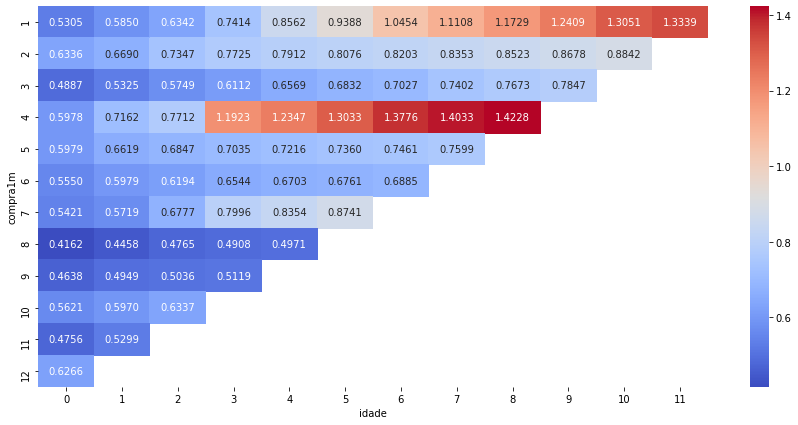

In [ ]:

plt.figure(figsize=(15, 7))
sn.heatmap(romi_acumulado, annot=True, cmap='coolwarm', cbar=True, fmt = '.4f')

para efeitos de marketing, acho melhor analizar o coortes pelo dia de primeiro acesso, não da primeira compra então vou criar outra tabela para isso, usando o codigo anterior como modelo (inclusive usando as mesmas variaveis de antes).

In [ ]:
compras_agrupradas_coorte = compras.groupby(
    ['acesso1m', 'mes']
).agg({'compra': 'sum'}).reset_index()
compras_agrupradas_coorte=compras_agrupradas_coorte.rename(columns={'compra': 'receita'})
usuarios_por_coorte = compras.groupby('acesso1m').agg({'Uid': 'nunique'}).reset_index()
usuarios_por_coorte.columns = ['acesso1m', 'n_usuario_coorte']
cp=pd.merge(compras_agrupradas_coorte,usuarios_por_coorte, on='acesso1m')

cp['idade']=cp['mes']-cp['acesso1m']
cp['ltv']=cp['receita']/cp['n_usuario_coorte']

custo_mes=custos.groupby('mes')['custo'].sum().reset_index()

compra_custo=pd.merge(cp,custo_mes, left_on ='acesso1m', right_on='mes')

In [ ]:
compra_custo

,acesso1m,mes_x,receita,n_usuario_coorte,idade,ltv,mes_y,custo,cac,romi
0,1,1,9557.49,2922,0,3.270873,1,18015.00,6.165298,0.530530
1,1,2,2664.58,2922,1,0.911903,1,18015.00,6.165298,0.147909
2,1,3,1464.69,2922,2,0.501263,1,18015.00,6.165298,0.081304
3,1,4,3882.09,2922,3,1.328573,1,18015.00,6.165298,0.215492
4,1,5,3940.59,2922,4,1.348593,1,18015.00,6.165298,0.218739
...,...,...,...,...,...,...,...,...,...,...
74,10,12,774.77,2838,2,0.272999,10,30415.27,10.717149,0.025473
75,11,11,8043.82,1888,0,4.260498,11,22289.38,11.805816,0.360881
76,11,12,1838.73,1888,1,0.973904,11,22289.38,11.805816,0.082494
77,12,12,10368.11,2314,0,4.480601,12,22224.27,9.604265,0.466522


<AxesSubplot:xlabel='idade', ylabel='acesso1m'>

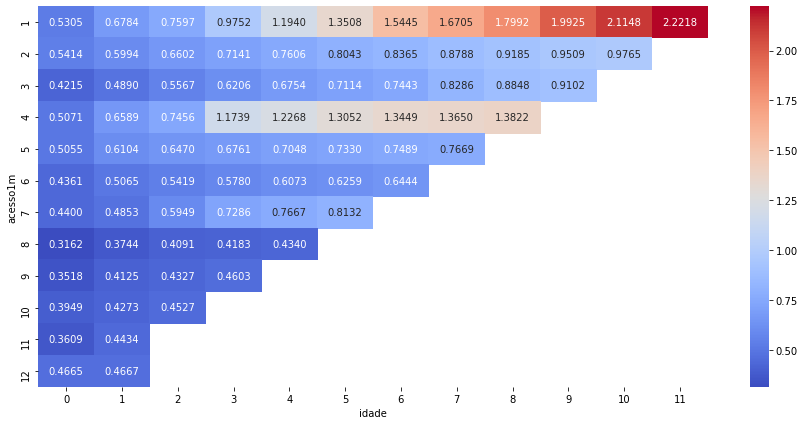

In [ ]:

compra_custo['cac'] = compra_custo['custo'] / compra_custo['n_usuario_coorte']
compra_custo
compra_custo['romi'] = compra_custo['ltv'] / compra_custo['cac']
romi = compra_custo.pivot_table(
    index='acesso1m', columns='idade', values='romi', aggfunc='mean'
)

romi_acumulado2=romi.cumsum(axis=1).round(4)
plt.figure(figsize=(15, 7))
sn.heatmap(romi_acumulado2, annot=True, cmap='coolwarm', cbar=True, fmt = '.4f')

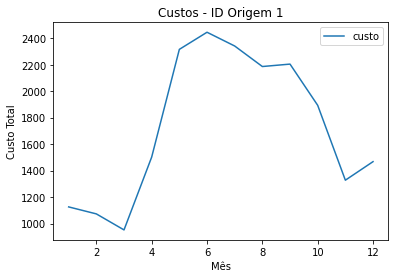

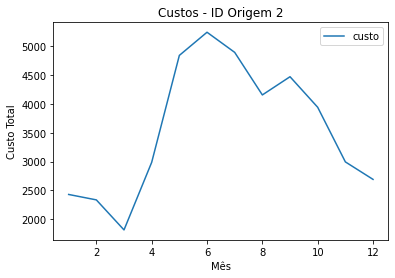

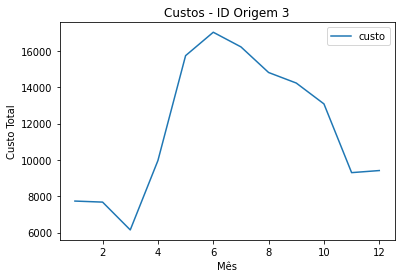

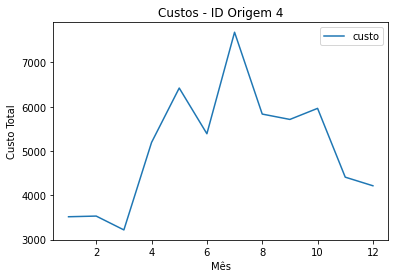

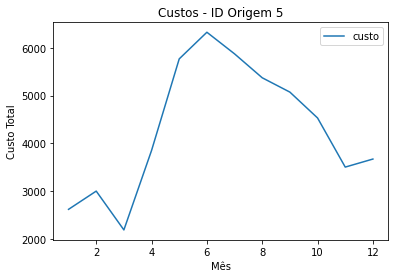

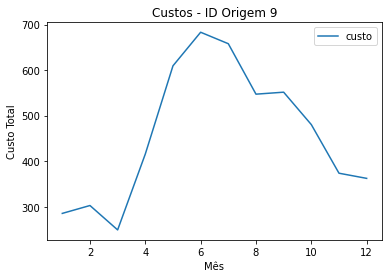

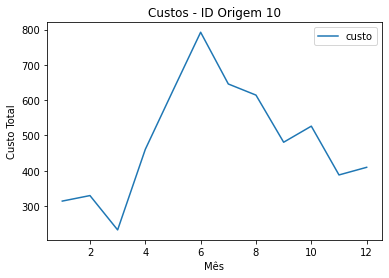

In [ ]:
for num in id:
    a=custos[custos['id_origem']==num]
    plotdf=a.pivot_table(index=['mes'], values='custo',aggfunc='sum')
    
    plotdf.plot()
    plt.title(f'Custos - ID Origem {num}')
    plt.xlabel('Mês')
    plt.ylabel('Custo Total')
    plt.show()


observo que as propagandas foram distribuidas de forma muito parecida entre as diferentes origens, sendo os meses 5, 6 e 7(outubro novembro e dezembro) os que tiveram mais investimentos.
Entretanto, apenas o coorte do mes 1, 4 e 7 tiveram bons desempenhos.
assim concluo que as que tiveram proporcionalmente mais investimentos nesses meses e não nos outros são mais eficientes. olhando as tabelas escolho a origen: 4 

16% dos usuarios chegam a comprar alguma coisa, desses apenas 17% compram de novo.
apenas 22% acessam uma segunda vez.
